## 'Programming for Data Analysis' project

## Contents

1. [Problem statement](#Problem-statement)<br>
   i. [Requirements](#Requirements)<br>
2. [Method](#Method)<br>
3. [Choose Dataset](#Choose-Dataset)<br>
4. [Import Libraries](#Import-Libraries)<br>
5. [Examine the dataset](#Examine-the-dataset)<br>
    a. [Read in the dataset](#Read-in-the-dataset)<br>
    b. [First five rows](#First-five-rows)<br>
    c. [Last five rows](#Last-five-rows)<br>
    d. [Data types of variables](#Data-types-of-variables)<br>
    e. [Basic statistics](#Basic-statistics)<br>
6. [Format dataset](#Format-dataset)<br>
7. [Visual summary of variables](#Visual-summary-of-variables)<br>
8. [Probability distributions of variables](#Probability-distributions-of-variables)<br>
    a. [Fixed acidity](#Fixed-acidity)<br>
    b. [Volatile acidity](#Volatile-acidity)<br>
    c. [Citric acid](#Citric-acid)<br>
    d. [Residual sugar](#Residual-sugar)<br>
    e. [Chlorides](#Chlorides)<br>
    f. [Free sulfur dioxide](#Free-sulfur-dioxide)<br>
    g. [Total sulfur dioxide](#Total-sulfur-dioxide)<br>
    h. [Density](#Density)<br>
    j. [pH](#pH)<br>
    k. [Sulphates](#)<br>
    l. [Alcohol](#)<br>
    m. [Quality](#Quality)<br>
9. [Variables and quality](#Variables-and-quality)<br>
    a. [Observations of variables versus quality](#Observations-of-variables-versus-quality)
19. [Conclusion](#Conclusion)
20. [References](#References)<br>

## Problem statement

Create a data set by simulating a real-world phenomenon of
your choosing.<br> You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life.<br> 
Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

### Requirements

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables. 

2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

3.  Synthesise/simulate a data set as closely matching their properties as possible.

4.  Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Method

For this project, a dataset is needed to synthesise the data from. Regardless of what the real-world phenomenon might be, there more than likely will be a dataset related to the phenomenon.
The following process will be used to work through the project.

1. Choose dataset
2. Import all necessary Python libraries for analysis, plotting, etc
3. Examine dataset - variable types, missing rows, etc
4. Format dataset as needed
5. Visual summary of variables - see where the 'bulk' of information is.
6. Determine probability distribution of each variable in the dataset
7. Generate synthetic data from each variable
8. Check synthetic data has the same probability distribution as original data

## Choose Dataset

For this project, the dataset of portuguese red wine will be used - for the simple fact that I like red wine and want to know what makes a good wine.

The dataset will be in a csv (comma-seperated value) format.

## Import Libraries

Import all the libraries needed for the project.

As the data is in tabular format we need:
- Pandas and Numpy for working with tabular data and numerical arrays
- Matplotlib and seaborn for visualising the data
- Distfit or Fitter to determine the probability distribution of variables
- Scipy to generate the synthetic data

In [280]:
import pandas as pd
import numpy as np
from numpy import random
# Import matplotlib and seaborn to visualise data
import matplotlib.pyplot as plt
import seaborn as sns
# distfit is used to find the type of distribution
from distfit import distfit
# Fitter is another library to find the distribution
from fitter import Fitter, get_common_distributions, get_distributions
# scipy to generate synthetic data
from scipy.stats import lognorm
from scipy import stats

## Examine the dataset

The dataset is read in, and the data summary observed.
Then the top 10/last 10 rows can be seen, as information about all the data types of each variables, i.e. are they strings, integers, floating-point numbers, etc.

From there, basic statistics can be generated and the dataset can be cleaned up by removing any duplicate or unnecessary columns.

### Read in the dataset

Read in the dataset and see the first five/last five rows.

In [136]:
# Read in the csv file - note that the csv is in the same folder as this notebook
df = pd.read_csv('WineQT.csv')
df

# To-do:
# Run command to check for missing data
# Re-format text above to put in bullet points so that it's easier to read.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


### First five rows

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Last five rows

In [8]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


### Data types of variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Basic statistics

In [406]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Format dataset

Drop the Id column as it's not necessary to reference the rows and/or columns.

In [11]:
df = df.drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## Visual summary of variables

Below, all 12 variables will be plotted. Note how *quality* has been left in, but whilst all the other variables are some type of chemical compound, *quality* is arbitrary and has been determined:
- either manually
- through a relationship or pattern between one or more variables.

In [62]:
wine_variables = df.columns.values.tolist()
wine_variables

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

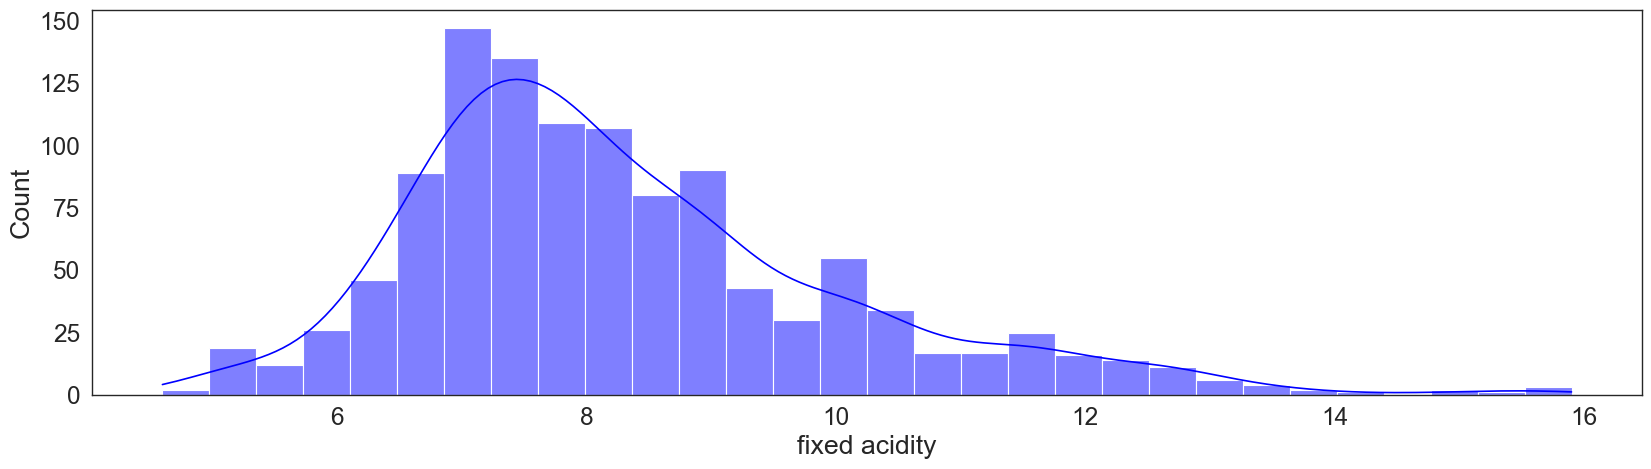

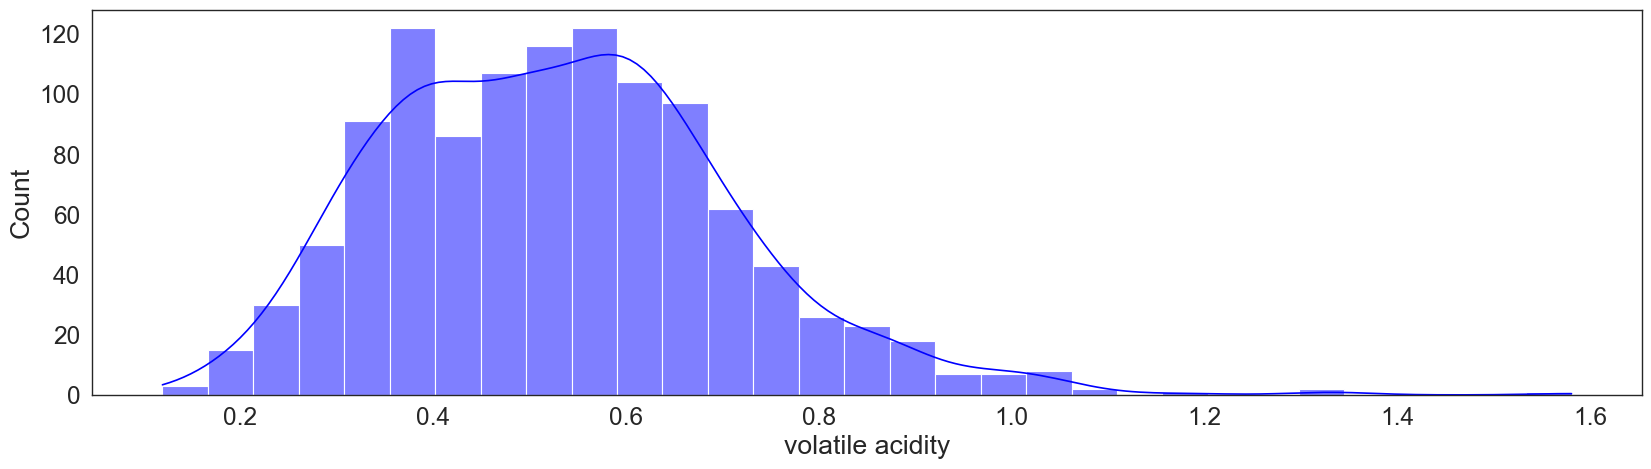

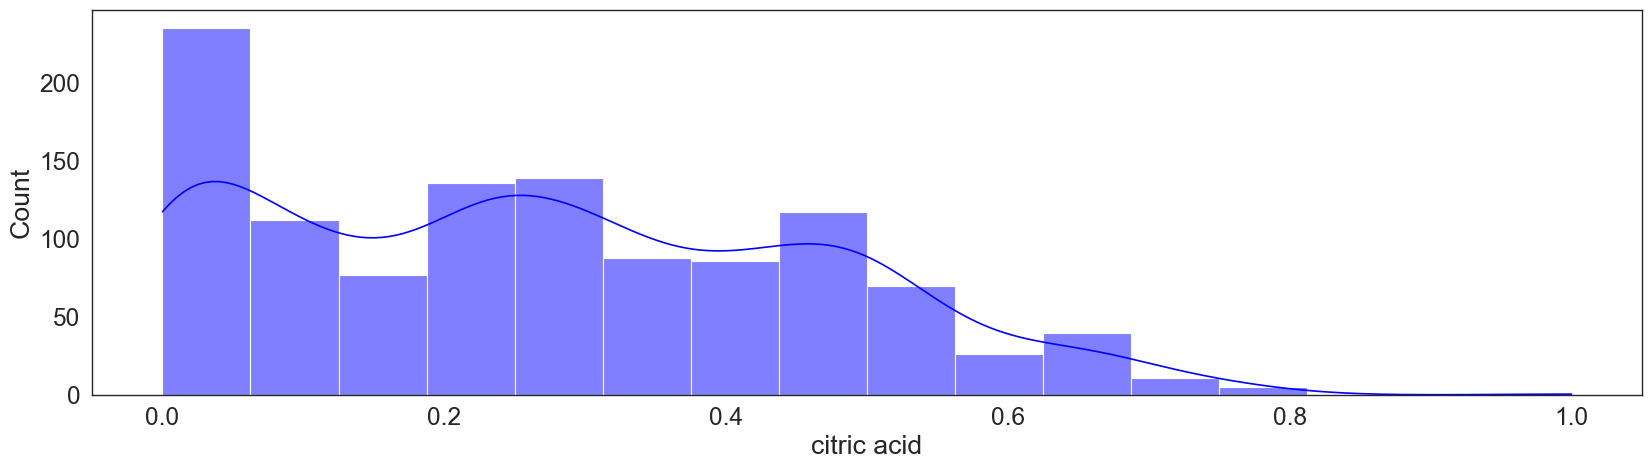

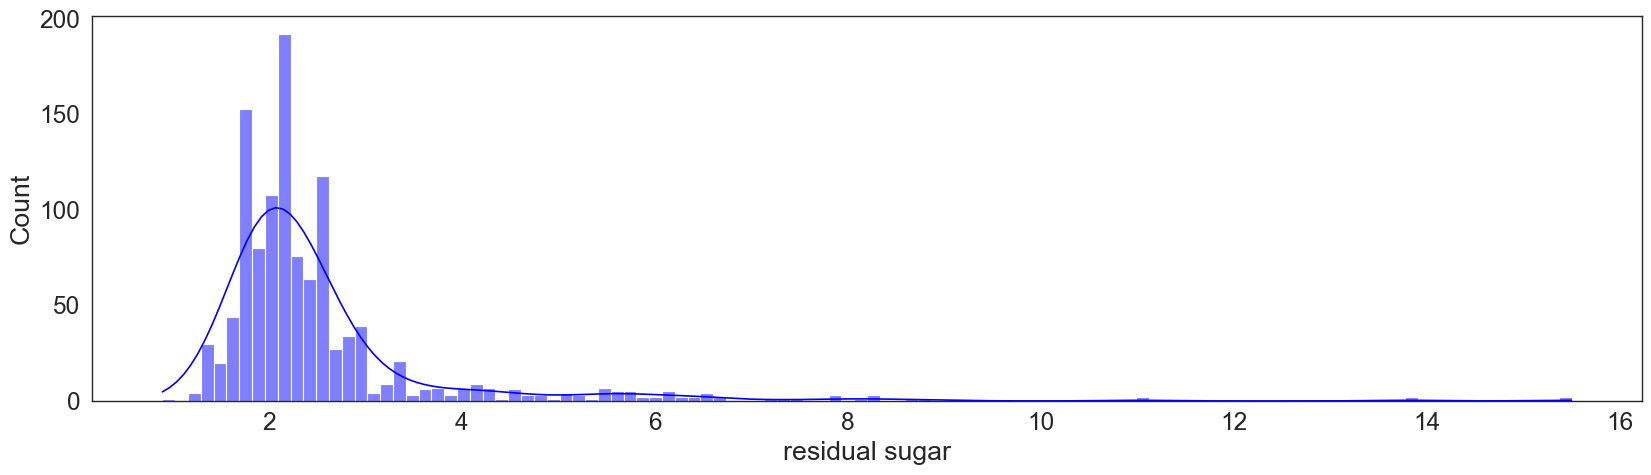

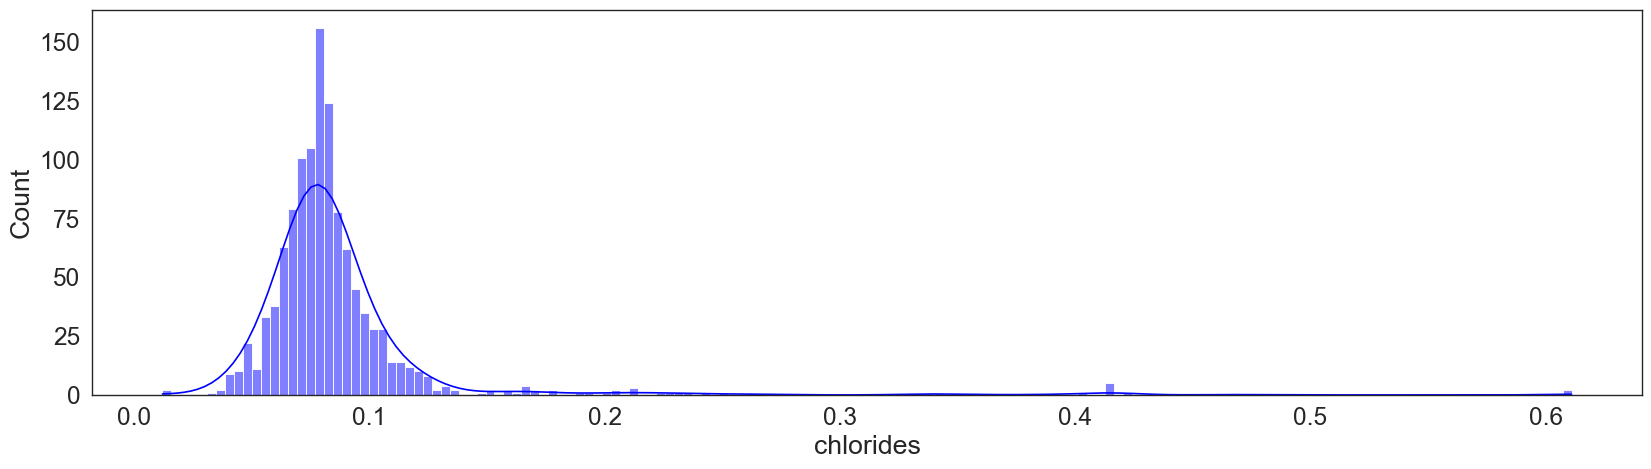

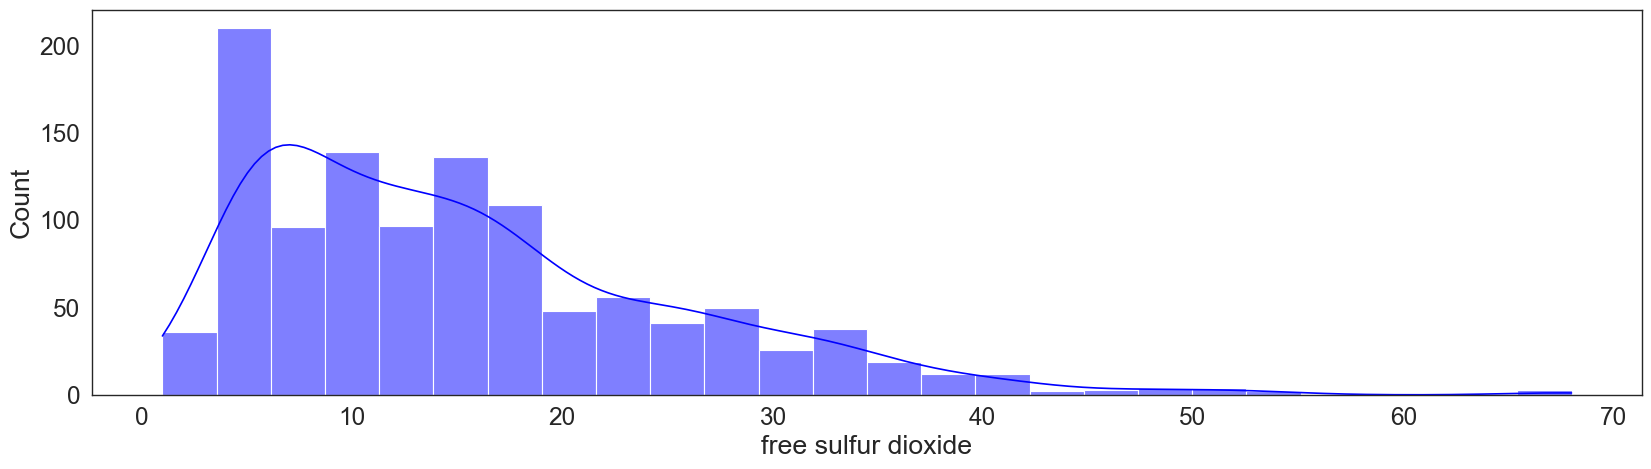

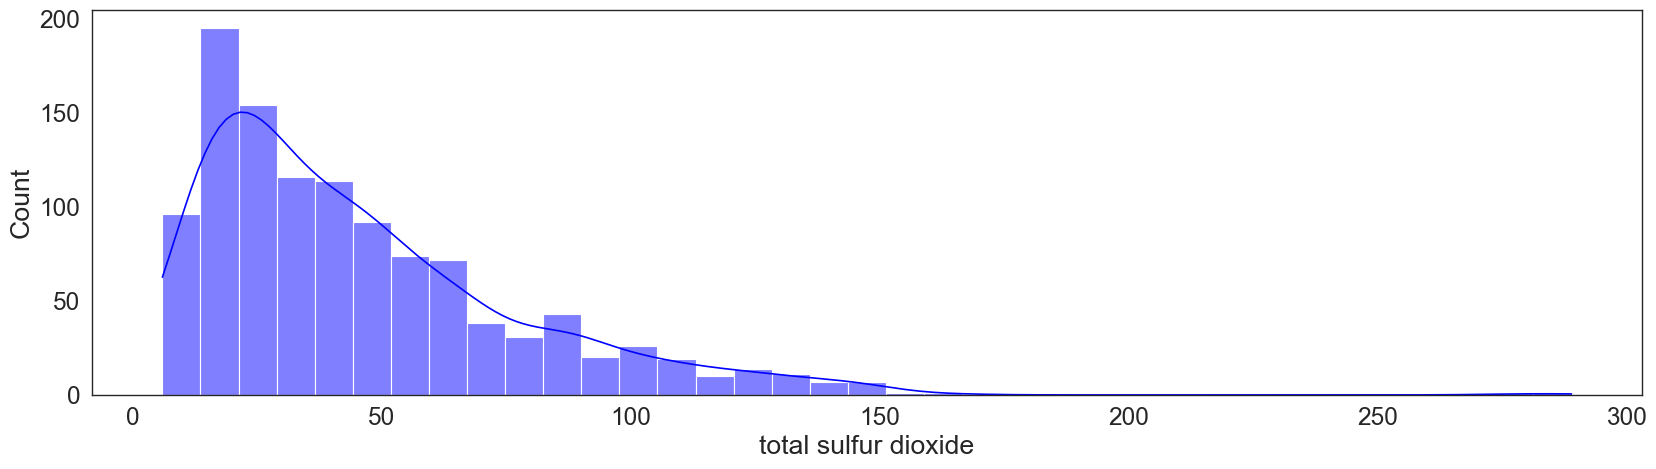

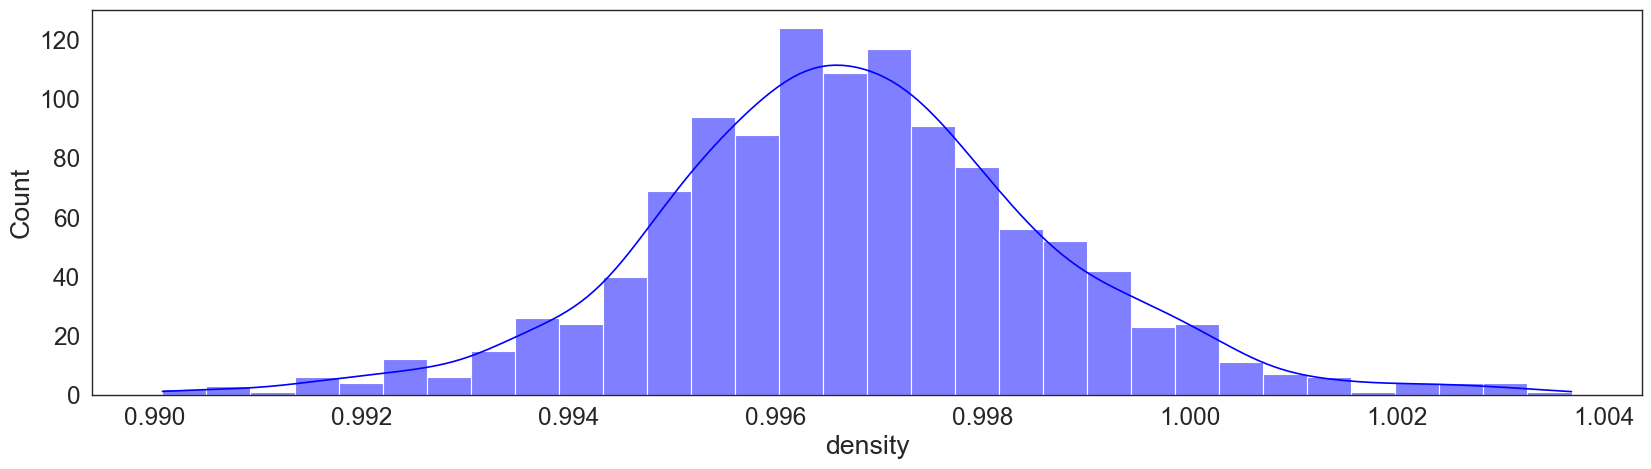

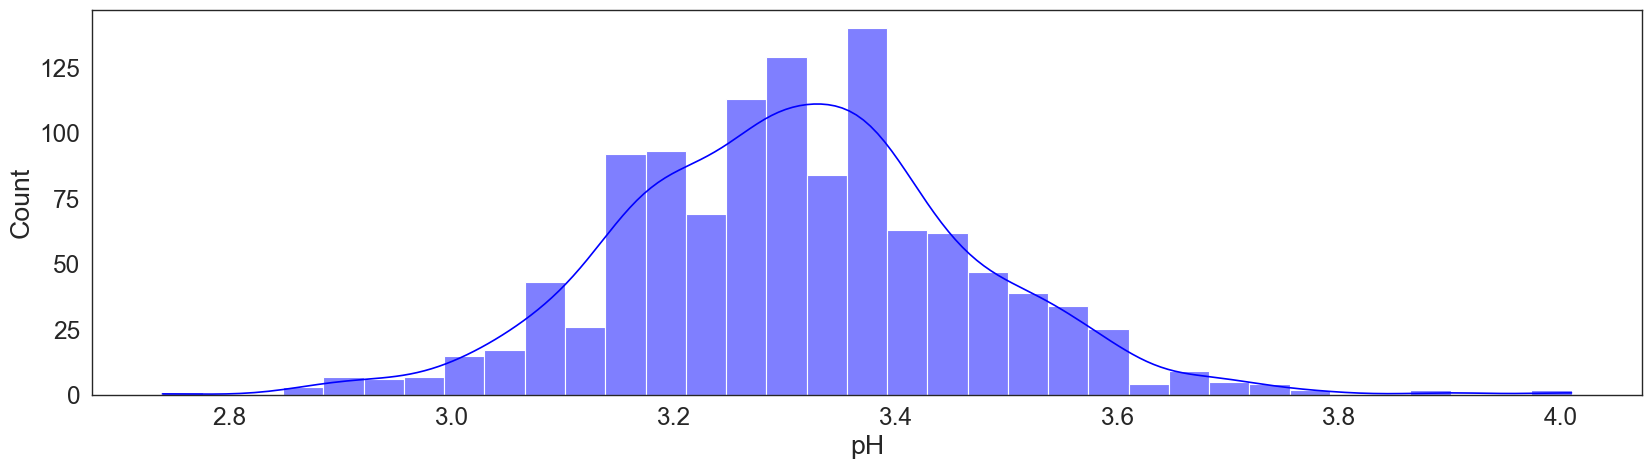

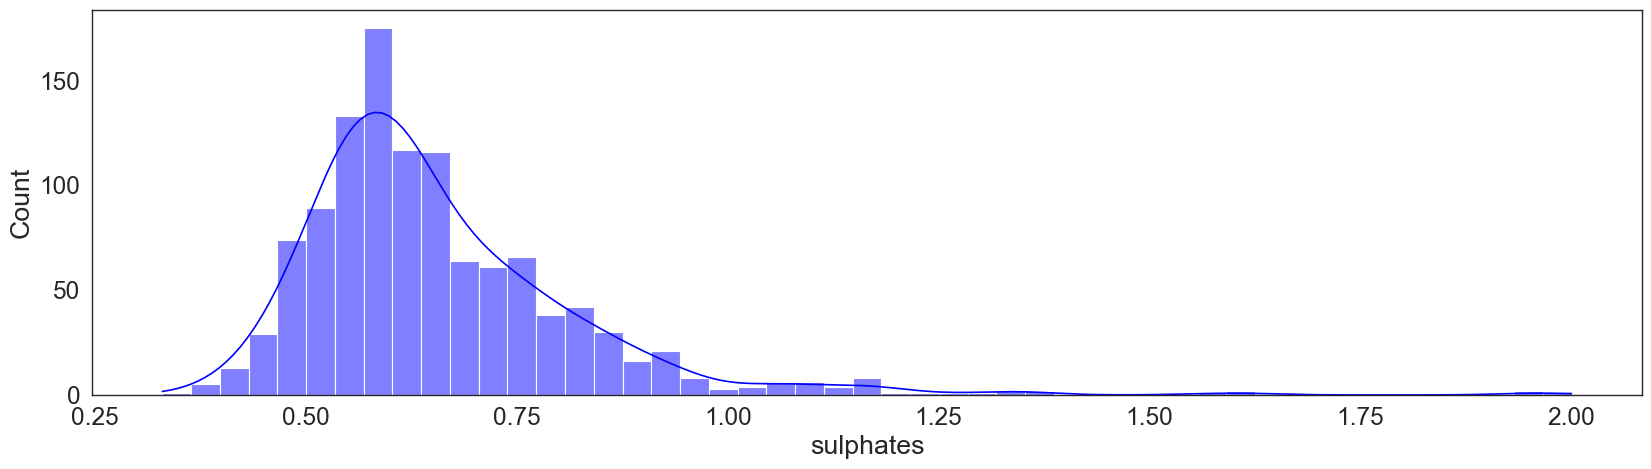

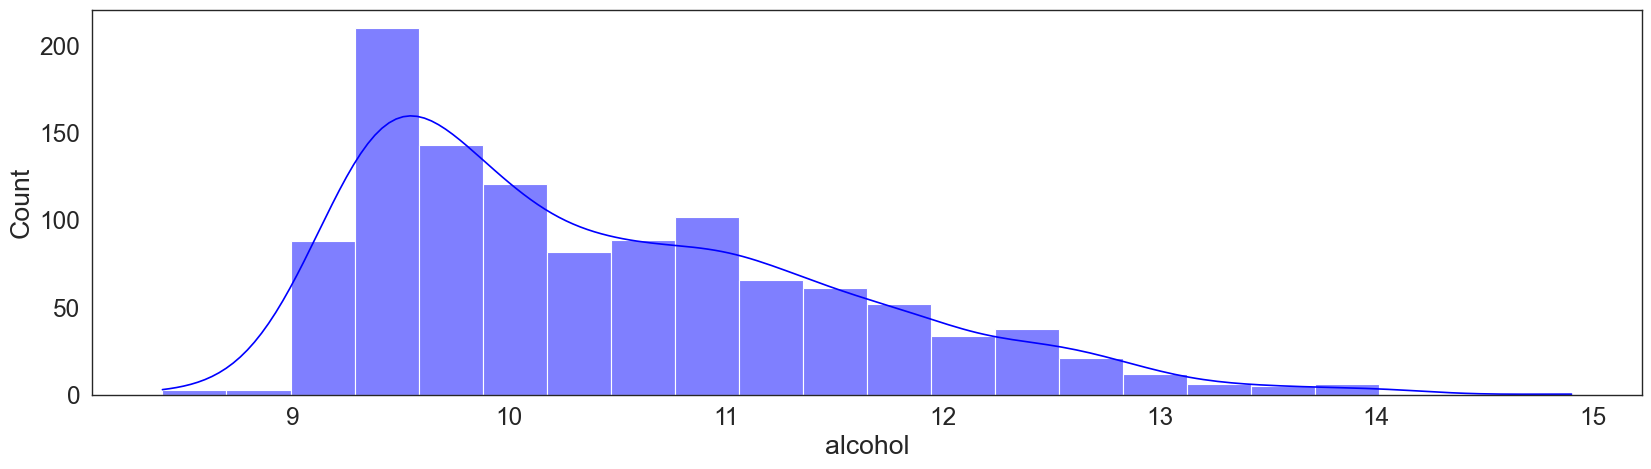

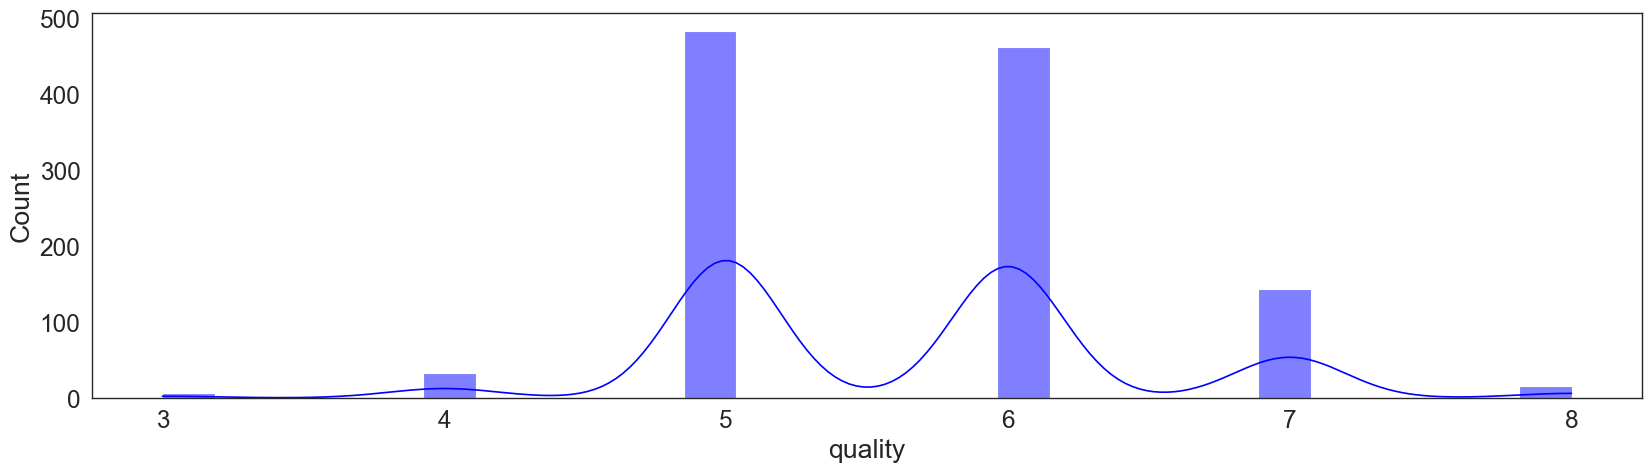

In [84]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in wine_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.histplot(df[variable],color='blue',kde=True)
    #plt.show()

## Probability distributions of variables

The method to determine the probability distributions will be as follows:
1. Plot a histogram of the variables data
2. Determine the likely probability distributions using the ***Fitter*** library
3. Determine the best method by using 'sum squared error' on the likely distributions
4. Use the generated parameters to generate synthetic data for the variable
5. Check that the generated synthetic data has the same probability distribution as the variable.
6. Append the checked, synthesised data to a dataframe 

The synthetic data generated will be approximately equal in number to the 'real' data - 1143 rows.
The reasoning behind this is that machine learning models typically seperate the data from anywhere in the range 50/25/25 to 75/15/10 - so double the amount of original data should be ample for any developments.

## Fixed acidity

Analyse the *fixed acidity* variable and determine it's probability distribution using the 'Fitter' library

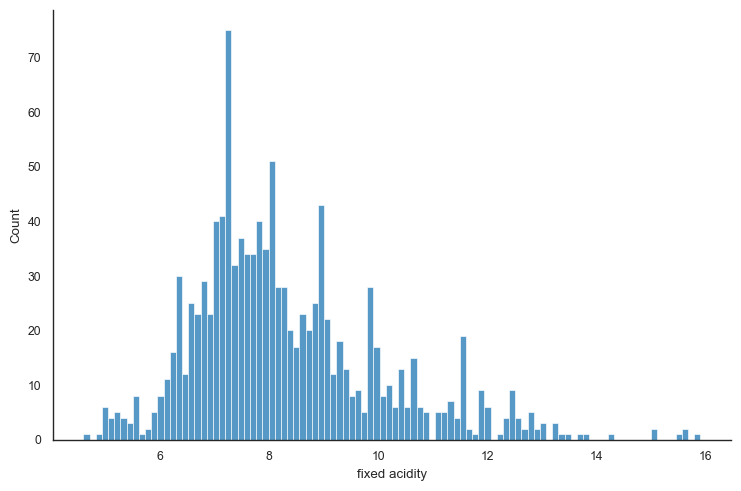

In [143]:
# Plot histograms of the data
sns.set_style('white')
sns.set_context("paper", font_scale=1)
sns.displot(data=df, x="fixed acidity", kind="hist", bins=100, aspect=1.5)

Determine the probability distribution using the 'Fitter' library.<br>
The values from the first column will be passed through the library (see below):

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.60it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.282317,678.293554,-9472.788689,inf,0.050560,5.592020e-03
chi2,0.299474,686.607150,-9405.354595,inf,0.057939,8.906417e-04
gamma,0.299475,686.607061,-9405.353280,inf,0.057939,8.905541e-04
cauchy,0.345093,681.612823,-9250.335602,inf,0.109318,2.373896e-12
rayleigh,0.386282,inf,-9121.456926,inf,0.152453,1.164303e-23


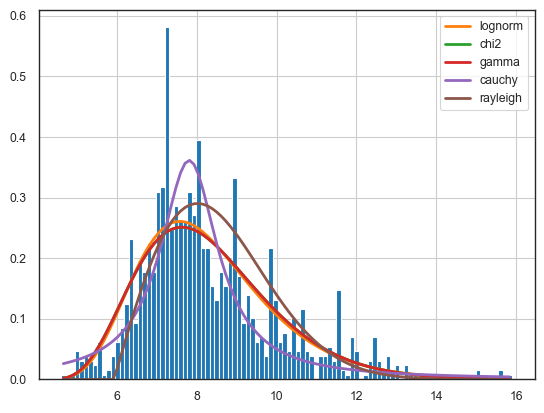

In [144]:
fixedAcidity = df["fixed acidity"].values
f = Fitter(fixedAcidity,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [145]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.3111165908311433,
  'loc': 2.894249875615288,
  'scale': 5.159301783923943}}

In [92]:
# Reminder about the variables from the first column:
# Get kurtosis, skew and variance
kurt = df["fixed acidity"].kurt()
print(f'Kurtosis is :\n{kurt}')

std_fa = df["fixed acidity"].std()
print(f'\nThe standard deviation is: \n{std_fa}')

var_fa = (std_fa)**2 
print(f'\nThe variance is: \n{var_fa}')

skew_fa = df["fixed acidity"]
print(f'\nThe skew is: \n{skew_fa.skew()}')

mean_fa = df["fixed acidity"].mean()
print(f'\nThe mean is: \n{mean_fa}')

Kurtosis is :
1.3846135487241824

The standard deviation is: 
1.747595017169539

The variance is: 
3.054088344035801

The skew is: 
1.0449299563724053

The mean is: 
8.311111111111119


### Synthesised data: fixed acidity

Now that the probability distribution is known, data can be synthesised with the identical probability distribution of the fixed acidity data and the same number of data points (1143).

mean: 8.3111
std:  1.7476


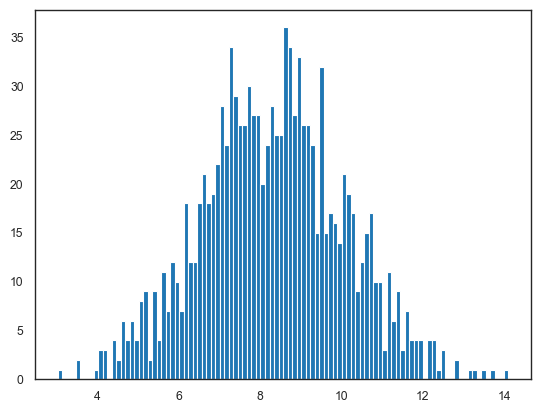

In [146]:
# fa_synth is the fixed acidity, synthesised data
fa_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
fa_synth = (fa_synth - np.mean(fa_synth)) / np.std(fa_synth)

# get desired mean + std
fa_synth = (fa_synth * std_fa) + mean_fa

plt.hist(fa_synth, bins=100)
print(f"mean: {np.mean(fa_synth):.4f}")
print(f"std:  {np.std(fa_synth):.4f}")

Check generated data matches the original probability distribution:

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.15it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.063838,637.653509,-11172.059326,inf,0.014323,0.970520
gamma,0.063857,637.857615,-11171.726161,inf,0.013594,0.982307
norm,0.064243,637.165505,-11171.877283,inf,0.015077,0.953863
exponpow,0.113626,671.482660,-10513.057340,inf,0.056609,0.001263
cauchy,0.180507,618.256421,-9991.051037,inf,0.076985,0.000002


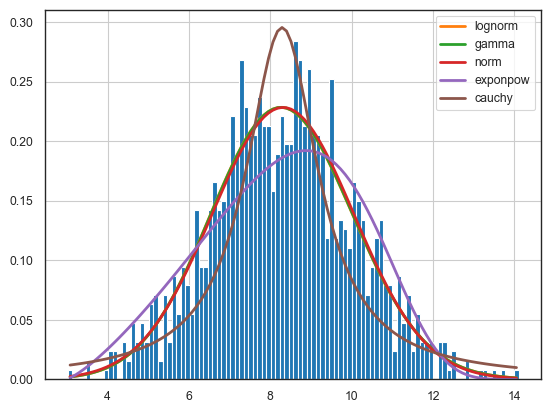

In [147]:
f = Fitter(fa_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

And so we can see that the synthesised data has the same probability distribution as the original and so we can expect similar behaviours when analysing the variable.<br>

### Append data

Now we need to create a new dataframe and insert the synthesised data into it.

In [114]:
df2 = pd.DataFrame(fa_synth)
print(df2)

              0
0      7.513601
1      9.869087
2      9.522239
3      7.390002
4      7.531836
...         ...
1138   5.984671
1139   8.381202
1140  10.495854
1141  12.539688
1142   7.746135

[1143 rows x 1 columns]


In [148]:
# Change the data type of the col header to string so that it can be edited.
df2.columns = df2.columns.astype("str")

df2.rename(columns = {"0":"Fixed Acidity"}, inplace = True)
print(df2)

      Fixed Acidity
0          7.513601
1          9.869087
2          9.522239
3          7.390002
4          7.531836
...             ...
1138       5.984671
1139       8.381202
1140      10.495854
1141      12.539688
1142       7.746135

[1143 rows x 1 columns]


Now the process is continued with each variable, determinining the probability distribution and generating data to match the distribution.

## Volatile acidity

Analyse the Volatile Acidity variable and determine it's probability distribution using the 'Fitter' library

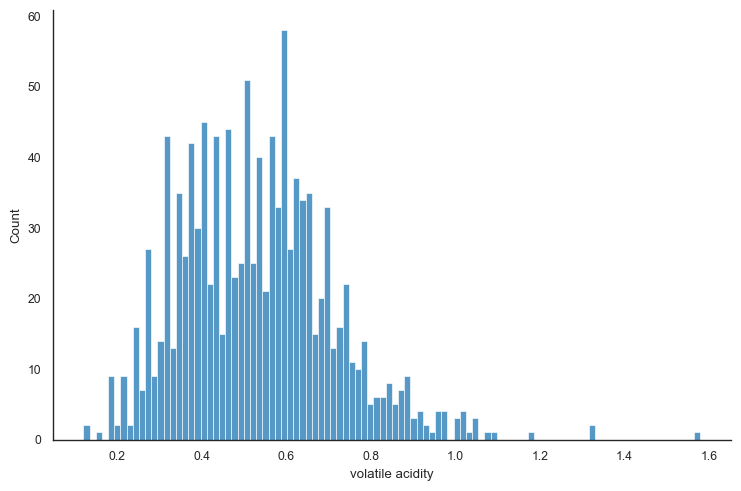

In [142]:
# Plot histograms of the data
sns.set_style('white')
sns.set_context("paper", font_scale=1)
sns.displot(data=df, x="volatile acidity", kind="hist", bins=100, aspect=1.5)

Use the Fitter library to determine the probability distribution:

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 46.33it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,16.189125,440.245925,-4844.709025,inf,0.043578,2.527282e-02
gamma,16.189127,440.246068,-4844.708847,inf,0.043577,2.527335e-02
lognorm,16.332038,424.769135,-4834.663216,inf,0.045014,1.887108e-02
norm,16.567258,710.219431,-4825.360095,inf,0.050588,5.555206e-03
exponpow,22.802897,899.257191,-4453.176758,inf,0.085841,8.912493e-08


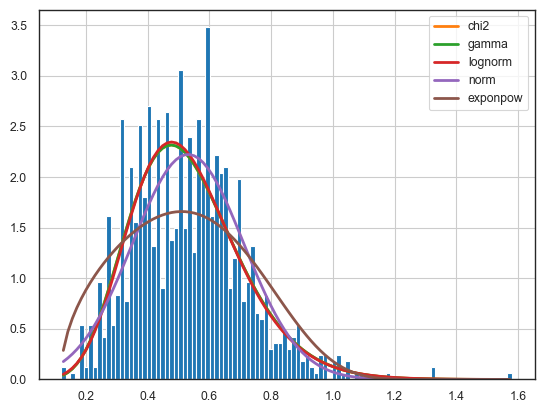

In [168]:
volatileAcidity = df["volatile acidity"].values
f = Fitter(volatileAcidity,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [133]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'chi2': {'df': 21.28150456047614,
  'loc': -0.05406603530302846,
  'scale': 0.02750766899560908}}

However, as the chi squared distribution is used to measure the fit between an observed distribution and a theoretical one, the gamma distribution will be used instead to synthesise the data.<br>
The reason behind this is if one was to look at the ***sumsquare_error*** column above, it can be seen that there is just 0.000002 of a difference between the chisquare and the gamma distribution.

In order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

In [153]:
mean_va, std_va = 0.5313, 0.1796
shape = (mean_va**2) / (std_va**2)
scale = (std_va**2)/mean_va
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

The shape is: 8.751187060084025
The scale is: 0.06071176359872013


mean: 0.5313
std:  0.1796


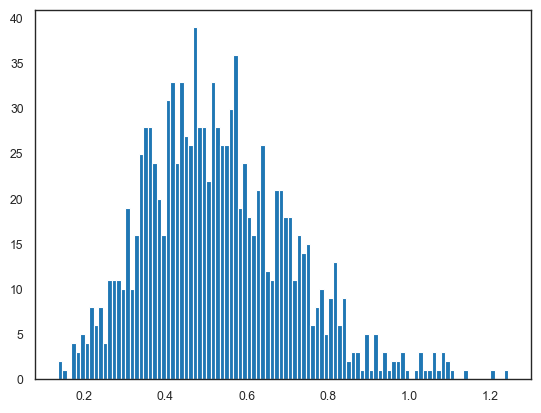

In [195]:
# Generate a random gamma distribution using the shape and scale
va_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
va_synth = (va_synth - np.mean(va_synth)) / np.std(va_synth)

# get desired mean + std
va_synth = (va_synth * std_va) + mean_va

plt.hist(va_synth, bins=100)
print(f"mean: {np.mean(va_synth):.4f}")
print(f"std:  {np.std(va_synth):.4f}")

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.26it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,3.785257,374.465108,-6505.746285,inf,0.013816,0.979145
chi2,3.785258,374.463954,-6505.745974,inf,0.013816,0.979145
lognorm,3.806807,356.320023,-6499.257388,inf,0.013675,0.981191
rayleigh,4.919345,inf,-6213.251303,inf,0.047354,0.011491
norm,7.284805,637.003277,-5764.491971,inf,0.057984,0.000880


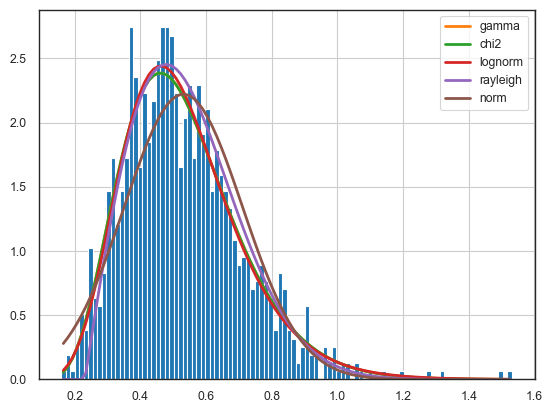

In [162]:
f = Fitter(va_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

The data has been synthesised, and it's probability distribution matches that of the original data, the next stage is to append the data to the new dataframe.

### Append data

In [165]:
# The new dataframe with the synthetic data for 'Fixed Acidity' added.
df2

,Fixed Acidity
0,7.513601
1,9.869087
2,9.522239
3,7.390002
4,7.531836
...,...
1138,5.984671
1139,8.381202
1140,10.495854
1141,12.539688


In [167]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Volatile Acidity'] = va_synth
df2

,Fixed Acidity,Volatile Acidity
0,7.513601,0.483550
1,9.869087,0.385455
2,9.522239,0.367196
3,7.390002,0.673073
4,7.531836,0.983339
...,...,...
1138,5.984671,0.418595
1139,8.381202,0.418785
1140,10.495854,0.340780
1141,12.539688,0.366514


### Citric acid

Analyse the **citric acid** variable and determine it's probability distribution using the 'Fitter' library.

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.57it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,62.234366,47.153336,-3305.582183,inf,0.218465,2.224383e-48
exponpow,67.951074,141.976692,-3205.134682,inf,0.121447,3.775495e-15
expon,84.698511,113.546048,-2960.361667,inf,0.143797,4.355640e-21
gamma,94.673607,163.501381,-2826.061788,inf,0.237984,1.922040e-57
rayleigh,99.797291,163.624965,-2772.860507,inf,0.087014,5.592465e-08


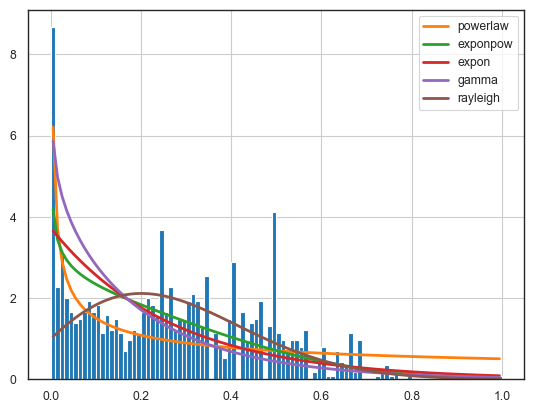

In [169]:
citricAcid = df["citric acid"].values
f = Fitter(citricAcid,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [170]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'powerlaw': {'a': 0.5277051017328287,
  'loc': -7.501749543560782e-28,
  'scale': 1.0730563982022998}}

### Synthesised data: citric acid

In [217]:
# the value for the a parameter is from the 'fitter' library
a = 0.5277051017328287
samples = 1143
ca_synth = np.random.power(a, samples)

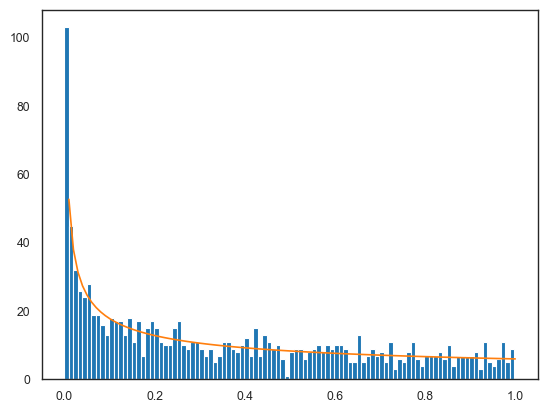

In [218]:
count, bins, ignored = plt.hist(s, bins=100)
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
plt.plot(x, normed_y)
plt.show()

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.17it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,14.960686,37.802487,-4934.907547,0.052622,0.025025,4.638937e-01
chi2,26.832364,98.758865,-4267.186461,0.115730,0.091640,8.377458e-09
exponpow,29.090790,69.072513,-4174.817387,0.085398,0.081088,5.510916e-07
gamma,30.403340,103.286655,-4124.375817,0.132834,0.122233,2.429612e-15
expon,56.840292,78.104012,-3416.250179,0.148810,0.090225,1.512634e-08


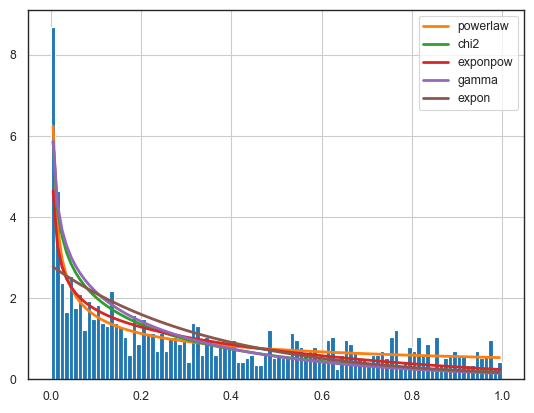

In [220]:
f = Fitter(ca_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

The probability distribution of the generated synthetic data matches that of the original data, so the next stage is to add a column to the dataframe with the new data.

### Append data

In [221]:
# The new dataframe with the previous two variables added
df2

,Fixed Acidity,Volatile Acidity
0,7.513601,0.483550
1,9.869087,0.385455
2,9.522239,0.367196
3,7.390002,0.673073
4,7.531836,0.983339
...,...,...
1138,5.984671,0.418595
1139,8.381202,0.418785
1140,10.495854,0.340780
1141,12.539688,0.366514


In [222]:
df2['Citric Acid'] = ca_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid
0,7.513601,0.483550,0.537570
1,9.869087,0.385455,0.579533
2,9.522239,0.367196,0.099072
3,7.390002,0.673073,0.222984
4,7.531836,0.983339,0.041609
...,...,...,...
1138,5.984671,0.418595,0.298969
1139,8.381202,0.418785,0.148120
1140,10.495854,0.340780,0.587139
1141,12.539688,0.366514,0.026616


### Residual sugar

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.97it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.518801,1050.559106,-8784.326545,inf,0.120677,5.803058e-15
lognorm,0.759073,1375.833145,-8342.286267,inf,0.125637,3.475819e-16
chi2,1.098216,1761.019465,-7920.124538,inf,0.174267,7.923811e-31
rayleigh,1.670072,2723.474600,-7448.043981,inf,0.280315,6.315116e-80
norm,2.079499,2964.364552,-7197.429327,inf,0.258690,5.950062e-68


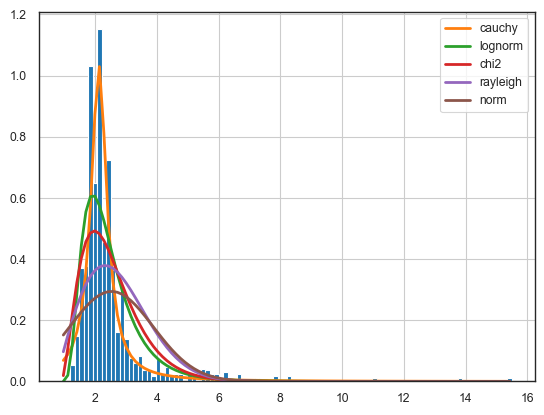

In [223]:
residualSugar = df["residual sugar"].values
f = Fitter(residualSugar,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [226]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 0.07823790817297994, 'scale': 0.009102579819038505}}

In [537]:
# Get the basic stats for residual sugar
df["residual sugar"].describe()

count    1143.000000
mean        2.532152
std         1.355917
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [541]:
std_rs = df["residual sugar"].std()
mean_rs = df["residual sugar"].mean()

In [ ]:
# testing

mean: 3.4551
std:  3.2230


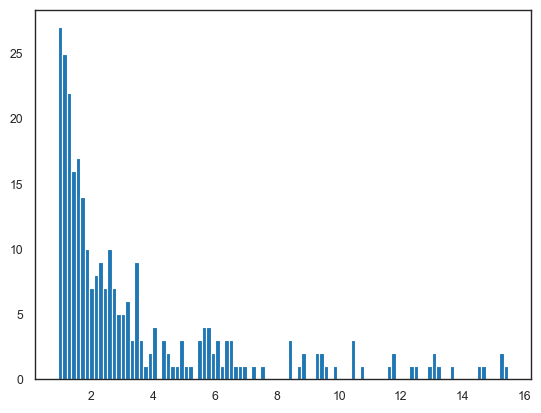

In [610]:
#resSug = mu + sigma * np.random.default_rng().standard_cauchy(1143)
resSug = cauchy.rvs(loc=0.07823790817297994, scale=0.009102579819038505, size=1143, random_state=None)

#Below is testing
# standardisation to get mean = 0, std = 1
#resSug = (resSug - np.mean(resSug)) / np.std(resSug)

# get desired mean + std
#resSug = (resSug * std_rs) + mean_rs

# truncate distribution so it plots well
resSug = s[(s>0.9) & (s<15.5)]  

plt.hist(resSug, bins=100)
print(f"mean: {np.mean(resSug):.4f}")
print(f"std:  {np.std(resSug):.4f}")

In [ ]:
# end testing

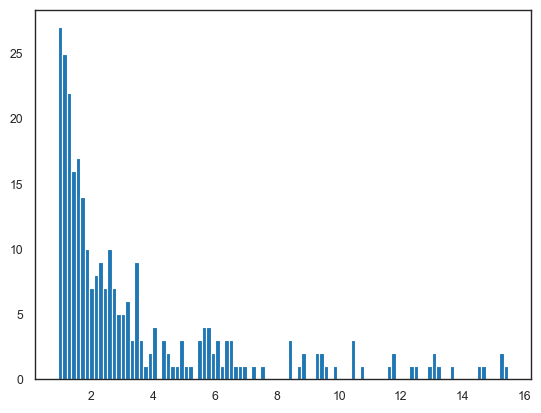

In [597]:
s = np.random.standard_cauchy(1143)
p = s[(s>0.9) & (s<15.5)]  # truncate distribution so it plots well
plt.hist(p, bins=100)
plt.show()

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.09it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.103985,765.576013,-2265.834104,inf,0.044157,0.612125
chi2,0.141219,749.636116,-2177.686716,inf,0.062381,0.203685
gamma,0.156351,747.617363,-2148.371867,inf,0.080859,0.043744
exponpow,0.220907,702.009149,-2048.827083,inf,0.121364,0.000373
expon,0.296592,762.338953,-1969.641518,inf,0.141201,0.000018


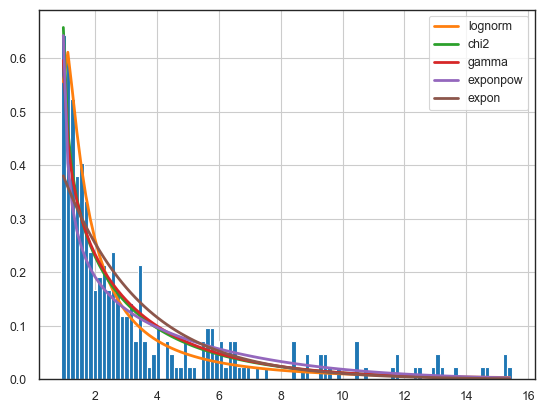

In [604]:
f = Fitter(resSug,
           distributions=get_common_distributions())
f.fit()
f.summary()

So basically, when the result isn't trimmed and the synthesised data is run through again, it gives a probability distribution equivalent to cauchy. 

In [256]:
mu, sigma = 2.532, 1.355917

In [396]:
resSug = mu + sigma * np.random.default_rng().standard_cauchy(1143)

#Below is testing
# standardisation to get mean = 0, std = 1
resSug = (va_synth - np.mean(va_synth)) / np.std(va_synth)

# get desired mean + std
resSug = (resSug * std_va) + mean_va

plt.hist(resSug, bins=100)
print(f"mean: {np.mean(resSug):.4f}")
print(f"std:  {np.std(resSug):.4f}")

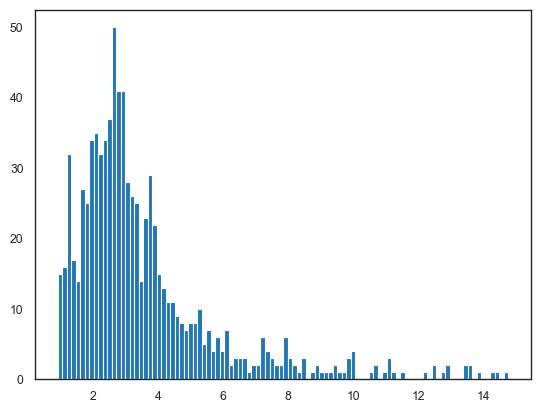

In [400]:
#resSug = resSug[(resSug>0.9) & (resSug<15.5)]  # truncate distribution so it plots well
plt.hist(resSug, bins=100)
plt.show()

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.16it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.125524,765.298408,-7359.469875,inf,0.038624,1.598377e-01
cauchy,0.127134,834.771334,-7355.519228,inf,0.134663,1.028461e-13
chi2,0.152518,780.335269,-7196.235730,inf,0.066734,1.090978e-03
gamma,0.152520,780.329943,-7196.224853,inf,0.066737,1.090180e-03
rayleigh,0.295852,936.375048,-6647.727834,inf,0.168196,3.423549e-21


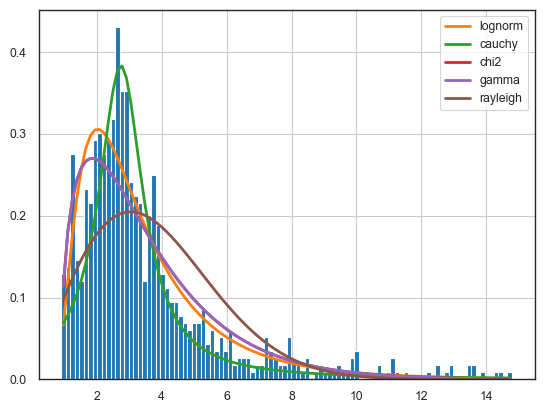

In [398]:
f = Fitter(resSug,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [390]:
resS = cauchy(mu, sigma)
print(resS)
print(len(resS))

TypeError: object of type 'rv_frozen' has no len()

In [ ]:
loc': 0.07823790817297994, 'scale': 0.009102579819038505

In [532]:
data = cauchy.rvs(size = 1143, loc = 0.07823790817297994, scale=0.009102579819038505)
print(data)

[-0.20796661  0.07385745  0.24027139 ...  0.09257123  0.06059065
  0.07972919]


In [533]:
print(np.max(data))

4.055290627215117


In [529]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Chlorides

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.18it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,71.952969,447.308356,-3146.768192,inf,0.070328,2.321774e-05
lognorm,513.168095,1380.419177,-894.199539,inf,0.135968,6.834813e-19
chi2,708.492425,1893.760583,-525.541000,inf,0.174286,7.800896e-31
rayleigh,993.381635,inf,-146.276360,inf,0.273945,2.721445e-76
norm,1363.155302,3175.822130,215.417362,inf,0.258152,1.146881e-67


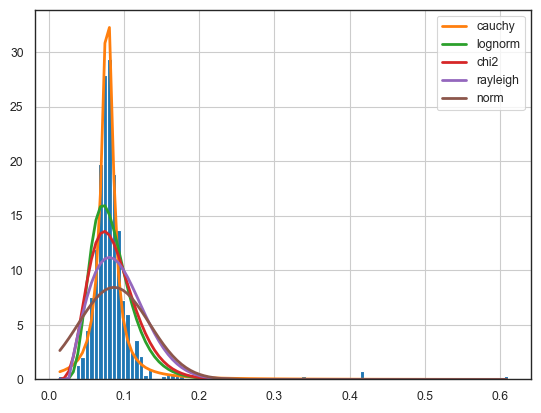

In [225]:
chlorides = df["chlorides"].values
f = Fitter(chlorides,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [227]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 0.07823790817297994, 'scale': 0.009102579819038505}}

### Free sulfur dioxide

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.45it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.034126,1083.574728,-11887.906252,inf,0.069641,2.894512e-05
gamma,0.034126,1083.572118,-11887.905306,inf,0.069643,2.892782e-05
lognorm,0.034476,1052.601577,-11876.240267,inf,0.078054,1.670447e-06
rayleigh,0.038287,1241.776403,-11763.455434,inf,0.113233,3.197448e-13
norm,0.041621,1349.171169,-11668.032123,inf,0.109704,1.954711e-12


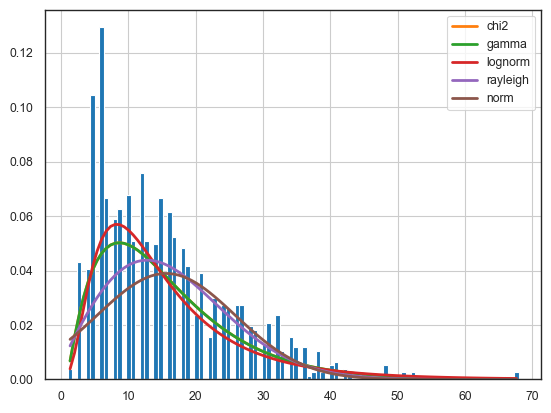

In [228]:
freeSulfurDioxide = df["free sulfur dioxide"].values
f = Fitter(freeSulfurDioxide,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [229]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'chi2': {'df': 4.23469841724244,
  'loc': 0.8228975231822295,
  'scale': 3.49317418851531}}

From the data above, using five decimal places, the chisquared distribution is equivalent to the Gamma distribution, so once again that will be used to generate the data.

In order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

In [409]:
mean_fsd, std_fsd = 15.615486, 10.250486
shape = (mean_fsd**2) / (std_fsd**2)
scale = (std_fsd**2)/mean_fsd
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

The shape is: 2.320716537006009
The scale is: 6.728734746788925


mean: 15.6155
std:  10.2505


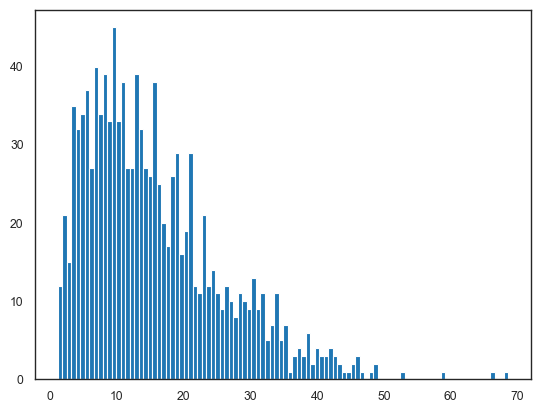

In [422]:
# Generate a random gamma distribution using the values for 
# shape and scale above with the samples needed
# 
fsd_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
fsd_synth = (fsd_synth - np.mean(fsd_synth)) / np.std(fsd_synth)

# get desired mean + std
fsd_synth = (fsd_synth * std_fsd) + mean_fsd

plt.hist(fsd_synth, bins=100)
print(f"mean: {np.mean(fsd_synth):.4f}")
print(f"std:  {np.std(fsd_synth):.4f}")

### Check the synthesised data

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.90it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.001958,1072.990672,-15155.040195,inf,0.018170,8.379821e-01
gamma,0.001958,1072.992861,-15155.036931,inf,0.018170,8.379814e-01
lognorm,0.002437,1060.999474,-14904.784947,inf,0.030294,2.400851e-01
exponpow,0.003956,1211.315771,-14350.770460,inf,0.047543,1.102873e-02
rayleigh,0.004351,1244.103905,-14249.018845,inf,0.083016,2.665739e-07


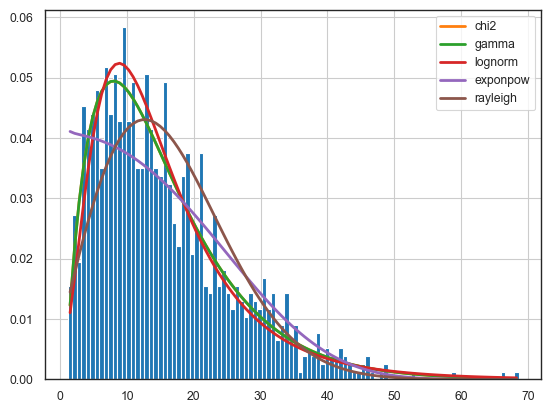

In [423]:
f = Fitter(fsd_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

As the synthesised data matches the probability distribution of the original data, the next step is to append it to the new dataframe.

### Append data

In [415]:
# What the existing data looks like:
df2

,Fixed Acidity,Volatile Acidity,Citric Acid
0,7.513601,0.483550,0.537570
1,9.869087,0.385455,0.579533
2,9.522239,0.367196,0.099072
3,7.390002,0.673073,0.222984
4,7.531836,0.983339,0.041609
...,...,...,...
1138,5.984671,0.418595,0.298969
1139,8.381202,0.418785,0.148120
1140,10.495854,0.340780,0.587139
1141,12.539688,0.366514,0.026616


In [416]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Free Sulfur Dioxide'] = fsd_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Free Sulfur Dioxide
0,7.513601,0.483550,0.537570,11.007689
1,9.869087,0.385455,0.579533,3.837211
2,9.522239,0.367196,0.099072,23.097502
3,7.390002,0.673073,0.222984,25.992375
4,7.531836,0.983339,0.041609,1.804264
...,...,...,...,...
1138,5.984671,0.418595,0.298969,11.986432
1139,8.381202,0.418785,0.148120,11.726770
1140,10.495854,0.340780,0.587139,3.173972
1141,12.539688,0.366514,0.026616,7.798173


### Total sulfur dioxide

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.96it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000294,1573.876081,-17322.314074,inf,0.040887,4.257391e-02
lognorm,0.000305,1460.024034,-17280.643635,inf,0.046468,1.390674e-02
exponpow,0.000721,1889.871767,-16296.899244,inf,0.071952,1.365823e-05
expon,0.000763,1450.360927,-16238.634179,inf,0.097630,6.187237e-10
rayleigh,0.000851,2167.622277,-16114.591485,inf,0.130048,2.583632e-17


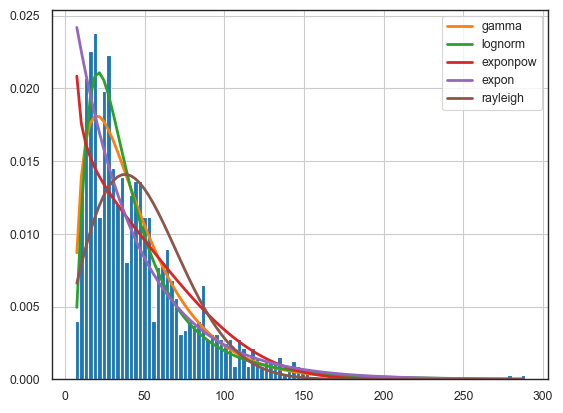

In [230]:
totalSulfurDioxide = df["total sulfur dioxide"].values
f = Fitter(totalSulfurDioxide,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [231]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 1.5405994629162971,
  'loc': 5.938952202291391,
  'scale': 25.948179556001335}}

The probability distribution for the ***total sulfur dioxide*** is the Gamma distribution and that's what will be used to generate synthetic data for that variable.

As with the previous variable, in order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

In [421]:
mean_tsd, std_tsd = 45.914698, 32.782130
shape = (mean_tsd**2) / (std_tsd**2)
scale = (std_tsd**2)/mean_tsd
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

The shape is: 1.9616843523498864
The scale is: 23.405752278647245


mean: 45.9147
std:  32.7821


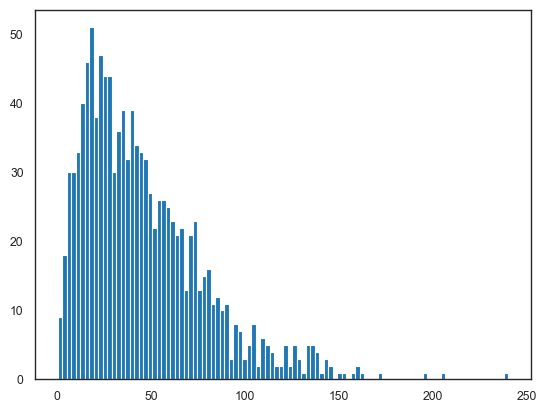

In [424]:
# Generate a random gamma distribution using the values for 
# shape and scale above with the samples needed
# 
tsd_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
tsd_synth = (tsd_synth - np.mean(tsd_synth)) / np.std(tsd_synth)

# get desired mean + std
tsd_synth = (tsd_synth * std_tsd) + mean_tsd

plt.hist(tsd_synth, bins=100)
print(f"mean: {np.mean(tsd_synth):.4f}")
print(f"std:  {np.std(tsd_synth):.4f}")

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.49it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000086,1398.730584,-18733.525317,inf,0.014179,9.731743e-01
lognorm,0.000125,1362.664118,-18299.581777,inf,0.030308,2.396136e-01
rayleigh,0.000336,1666.809778,-17177.481003,inf,0.087747,4.167660e-08
exponpow,0.000374,1622.953825,-17046.287225,inf,0.055337,1.751478e-03
norm,0.000612,1844.974295,-16490.291338,inf,0.095029,1.957453e-09


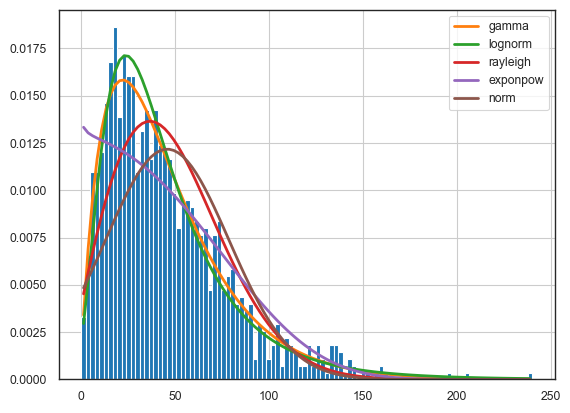

In [425]:
f = Fitter(tsd_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

As the synthesised data for the ***total sulfur dioxide*** matches the original data, the next stage is to append the data to the new dataframe.

### Append data

In [426]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Total Sulfur Dioxide'] = tsd_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Free Sulfur Dioxide,Total Sulfur Dioxide
0,7.513601,0.483550,0.537570,11.007689,14.420592
1,9.869087,0.385455,0.579533,3.837211,30.381073
2,9.522239,0.367196,0.099072,23.097502,30.230563
3,7.390002,0.673073,0.222984,25.992375,127.268999
4,7.531836,0.983339,0.041609,1.804264,9.889342
...,...,...,...,...,...
1138,5.984671,0.418595,0.298969,11.986432,38.347735
1139,8.381202,0.418785,0.148120,11.726770,42.427714
1140,10.495854,0.340780,0.587139,3.173972,39.247295
1141,12.539688,0.366514,0.026616,7.798173,89.096506


### Density

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.86it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,102329.821618,-642.949703,5158.388892,inf,0.040328,0.047256
gamma,102380.387314,-643.105925,5158.953560,inf,0.039758,0.052474
norm,103564.475548,-644.791441,5165.055741,inf,0.043950,0.023452
rayleigh,122827.955265,inf,5360.040417,inf,0.047168,0.011965
cauchy,144477.356406,-699.361665,5545.592927,inf,0.063031,0.000217


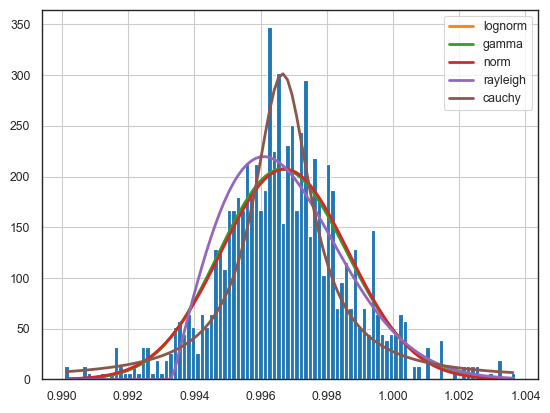

In [232]:
density = df["density"].values
f = Fitter(density,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [233]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.0231931248746051,
  'loc': 0.9138082551620588,
  'scale': 0.08289870127360321}}

The lognormal distribution is the best-fitting probability distribution for the ***density*** variable.

### Synthesised data: density

In [430]:
#reminder of the statistics for the column "density"
df.density.describe()

count    1143.000000
mean        0.996730
std         0.001925
min         0.990070
25%         0.995570
50%         0.996680
75%         0.997845
max         1.003690
Name: density, dtype: float64

In [445]:
std_d = df.density.std()
mean_d = df.density.mean()

mean: 0.9967
std:  0.0019


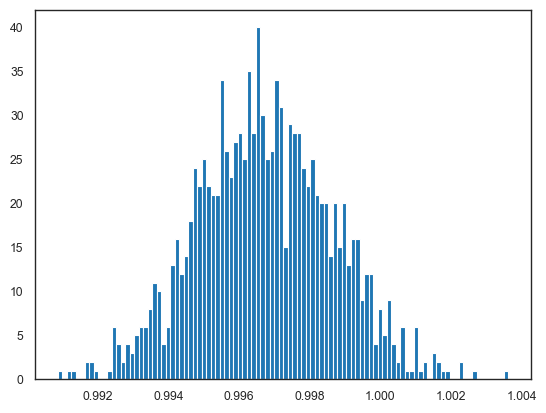

In [446]:
# fa_synth is the fixed acidity, synthesised data
d_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
d_synth = (d_synth - np.mean(d_synth)) / np.std(d_synth)

# get desired mean + std
d_synth = (d_synth * std_d) + mean_d

plt.hist(d_synth, bins=100)
print(f"mean: {np.mean(d_synth):.4f}")
print(f"std:  {np.std(d_synth):.4f}")

Now check the data

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.69it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,40955.817272,-691.103675,4111.735467,inf,0.012998,0.989124
gamma,40991.549510,-691.114099,4112.732252,inf,0.012806,0.990846
norm,41905.312362,-688.602234,4130.890184,inf,0.018135,0.839658
chi2,43586.220347,-698.932193,4182.884011,inf,0.024652,0.483213
cauchy,132058.390909,-729.838236,5442.861673,inf,0.078994,0.000001


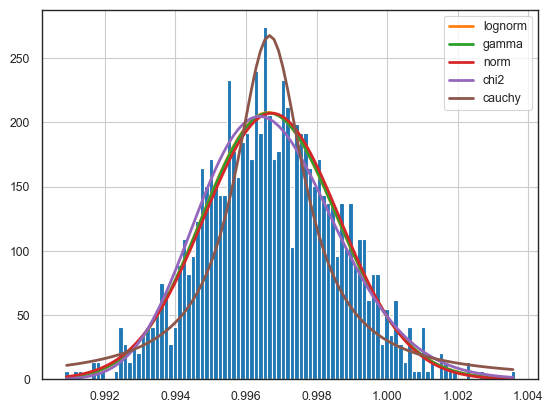

In [447]:
f = Fitter(d_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

As it's a lognormal distribution, the next stage is to append it to the dataframe that contains the rest of the synthesised data.

### Append data

In [448]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Density'] = d_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Free Sulfur Dioxide,Total Sulfur Dioxide,Density
0,7.513601,0.483550,0.537570,11.007689,14.420592,0.998937
1,9.869087,0.385455,0.579533,3.837211,30.381073,0.995904
2,9.522239,0.367196,0.099072,23.097502,30.230563,0.995721
3,7.390002,0.673073,0.222984,25.992375,127.268999,0.994279
4,7.531836,0.983339,0.041609,1.804264,9.889342,0.995079
...,...,...,...,...,...,...
1138,5.984671,0.418595,0.298969,11.986432,38.347735,0.997759
1139,8.381202,0.418785,0.148120,11.726770,42.427714,0.995011
1140,10.495854,0.340780,0.587139,3.173972,39.247295,0.998531
1141,12.539688,0.366514,0.026616,7.798173,89.096506,0.996357


### pH

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.84it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,31.102837,368.045508,-4098.376503,inf,0.039481,0.055181
gamma,31.110760,369.307168,-4098.085360,inf,0.039997,0.050229
norm,31.169029,381.720369,-4102.987989,inf,0.046276,0.014486
chi2,31.457147,363.517020,-4085.429527,inf,0.041992,0.034505
rayleigh,34.252542,inf,-3995.162120,inf,0.047113,0.012109


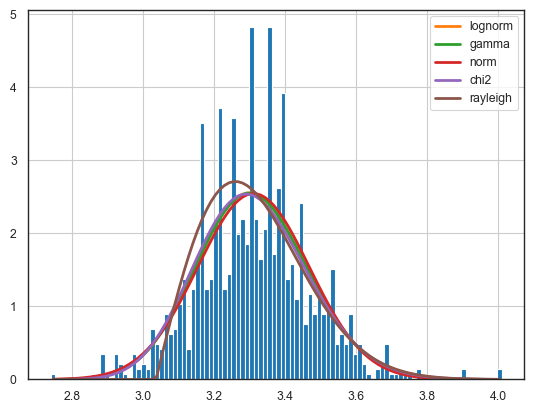

In [235]:
pH = df["pH"].values
f = Fitter(pH,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [236]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.04987881220975432,
  'loc': 0.17615195311598159,
  'scale': 3.1309642987432946}}

The lognormal distribution is the best-fitting probability distribution for the ***pH*** variable, so that's what will be used to synthesise the data.

### Synthesised data: pH

In [451]:
#reminder of the statistics for the column "pH"
df.pH.describe()

count    1143.000000
mean        3.311015
std         0.156664
min         2.740000
25%         3.205000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [454]:
std_pH = df.pH.std()
mean_pH = df.pH.mean()

mean: 3.3110
std:  0.1567


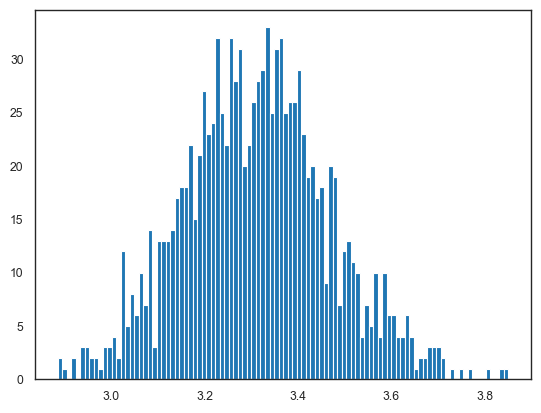

In [455]:
# fa_synth is the fixed acidity, synthesised data
pH_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
pH_synth = (pH_synth - np.mean(pH_synth)) / np.std(pH_synth)

# get desired mean + std
pH_synth = (pH_synth * std_pH) + mean_pH

plt.hist(pH_synth, bins=100)
print(f"mean: {np.mean(pH_synth):.4f}")
print(f"std:  {np.std(pH_synth):.4f}")

Check the synthesised data.

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.91it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,6.737387,140.118667,-5846.739928,inf,0.013874,0.978263
gamma,6.744378,140.258385,-5845.554535,inf,0.014053,0.975362
norm,6.849478,147.283958,-5834.921563,inf,0.019145,0.788759
chi2,6.871895,137.978859,-5824.145442,inf,0.017815,0.854681
exponpow,14.565221,170.366987,-4965.527720,inf,0.060995,0.000387


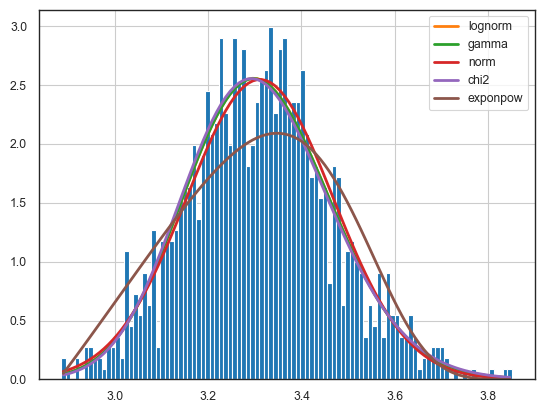

In [456]:
f = Fitter(pH_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

### Append data

In [457]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['pH'] = pH_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH
0,7.513601,0.483550,0.537570,11.007689,14.420592,0.998937,3.279306
1,9.869087,0.385455,0.579533,3.837211,30.381073,0.995904,3.333349
2,9.522239,0.367196,0.099072,23.097502,30.230563,0.995721,3.490545
3,7.390002,0.673073,0.222984,25.992375,127.268999,0.994279,3.522734
4,7.531836,0.983339,0.041609,1.804264,9.889342,0.995079,3.229045
...,...,...,...,...,...,...,...
1138,5.984671,0.418595,0.298969,11.986432,38.347735,0.997759,3.526539
1139,8.381202,0.418785,0.148120,11.726770,42.427714,0.995011,3.469677
1140,10.495854,0.340780,0.587139,3.173972,39.247295,0.998531,3.381360
1141,12.539688,0.366514,0.026616,7.798173,89.096506,0.996357,3.491842


### Sulphates

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.27it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,16.582935,646.171436,-4817.237659,inf,0.053279,2.924855e-03
gamma,19.515122,808.447413,-4631.139506,inf,0.074580,5.643112e-06
cauchy,22.393052,435.916575,-4480.948626,inf,0.112153,5.598255e-13
rayleigh,24.820764,inf,-4363.299824,inf,0.114257,1.870145e-13
norm,35.824969,1521.902468,-3943.859343,inf,0.129802,2.993513e-17


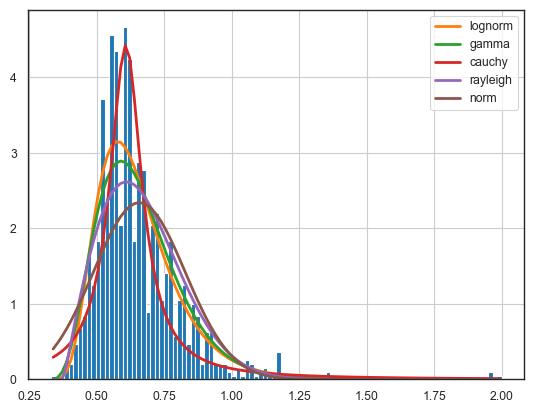

In [237]:
sulphates = df["sulphates"].values
f = Fitter(sulphates,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [238]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.39765079440234896,
  'loc': 0.28388853658643187,
  'scale': 0.34424385004467967}}

### Synthesised data: sulphates

In [458]:
# Reminder of the basic statistics for the sulphates variable.
df.sulphates.describe()

count    1143.000000
mean        0.657708
std         0.170399
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [461]:
std_s = df.sulphates.std()
mean_s = df.sulphates.mean()

mean: 0.6577
std:  0.1704


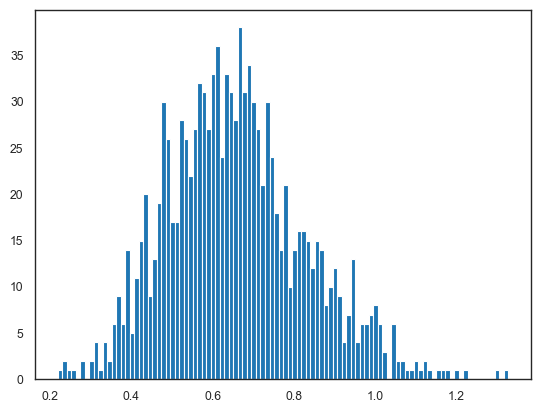

In [494]:
# random.lognormal was used this time as the 
# probability distribution wasn't matching the original
s_synth = random.lognormal(mean=mean_s, sigma=std_s, size=1143)

# standardisation to get mean = 0, std = 1
s_synth = (s_synth - np.mean(s_synth)) / np.std(s_synth)

# get desired mean + std
s_synth = (s_synth * std_s) + mean_s

plt.hist(s_synth, bins=100)
print(f"mean: {np.mean(s_synth):.4f}")
print(f"std:  {np.std(s_synth):.4f}")

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.12it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,6.379487,196.777566,-5909.130074,inf,0.020207,7.310687e-01
gamma,6.428954,198.882580,-5900.301338,inf,0.021663,6.486727e-01
chi2,6.428955,198.882580,-5900.301223,inf,0.021663,6.486658e-01
norm,8.517093,234.139151,-5585.858874,inf,0.046164,1.483549e-02
cauchy,15.530171,176.616480,-4899.247855,inf,0.088366,3.244675e-08


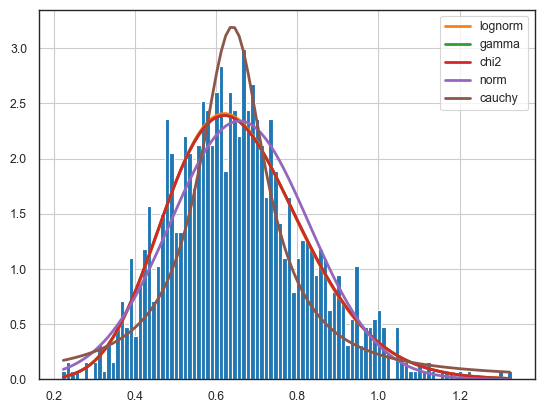

In [495]:
f = Fitter(s_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

As the probability distributions match, the next stage is to append the data to the new dataframe.

### Append data

In [496]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Sulphates'] = s_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates
0,7.513601,0.483550,0.537570,11.007689,14.420592,0.998937,3.279306,0.860454
1,9.869087,0.385455,0.579533,3.837211,30.381073,0.995904,3.333349,0.739314
2,9.522239,0.367196,0.099072,23.097502,30.230563,0.995721,3.490545,0.484721
3,7.390002,0.673073,0.222984,25.992375,127.268999,0.994279,3.522734,0.612030
4,7.531836,0.983339,0.041609,1.804264,9.889342,0.995079,3.229045,0.672409
...,...,...,...,...,...,...,...,...
1138,5.984671,0.418595,0.298969,11.986432,38.347735,0.997759,3.526539,0.560095
1139,8.381202,0.418785,0.148120,11.726770,42.427714,0.995011,3.469677,0.560870
1140,10.495854,0.340780,0.587139,3.173972,39.247295,0.998531,3.381360,0.568655
1141,12.539688,0.366514,0.026616,7.798173,89.096506,0.996357,3.491842,0.352487


### Alcohol

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.06it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,3.574221,543.267651,-6571.316108,inf,0.079198,1.105040e-06
gamma,3.643868,548.112632,-6549.258146,inf,0.084331,1.607735e-07
rayleigh,3.772686,549.937564,-6516.589778,inf,0.084266,1.648608e-07
norm,4.170972,629.050185,-6401.876184,inf,0.125816,3.134741e-16
cauchy,4.305494,557.052952,-6365.594163,inf,0.169352,3.976650e-29


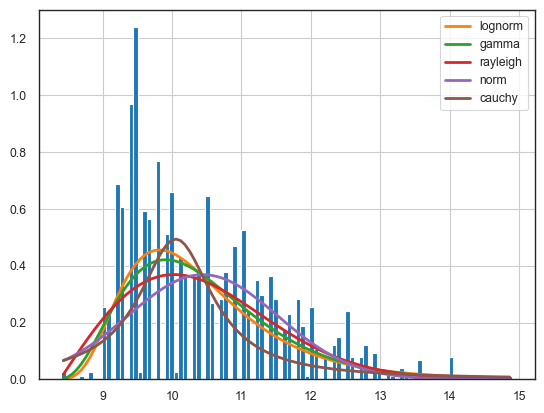

In [239]:
alcohol = df["alcohol"].values
f = Fitter(alcohol,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [240]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.4515446424218206,
  'loc': 8.067865159018577,
  'scale': 2.1467011211043987}}

### Synthesised data: alcohol

In [497]:
# Reminder of the basic statistics for the alcohol variable.
df.alcohol.describe()

count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [498]:
std_a = df.alcohol.std()
mean_a = df.alcohol.mean()

mean: 10.4421
std:  1.0822


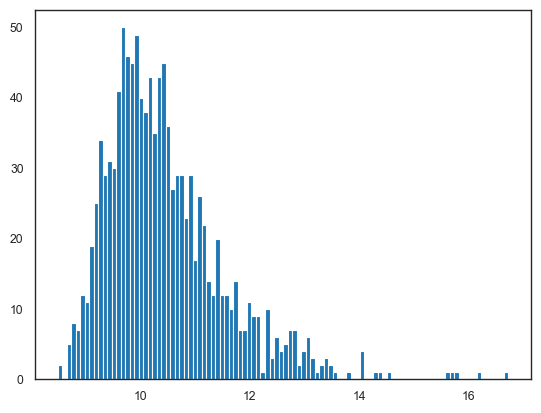

In [520]:
a_synth = lognorm.rvs(s=0.4515,loc=8.067865,scale=2.1467, size=1143)

# standardisation to get mean = 0, std = 1
a_synth = (a_synth - np.mean(a_synth)) / np.std(a_synth)

# get desired mean + std
a_synth = (a_synth * std_a) + mean_a

plt.hist(a_synth, bins=100)
print(f"mean: {np.mean(a_synth):.4f}")
print(f"std:  {np.std(a_synth):.4f}")

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.090547,715.410254,-10772.564583,inf,0.017203,8.817078e-01
gamma,0.110827,756.987947,-10541.564062,inf,0.030673,2.277226e-01
rayleigh,0.192830,inf,-9915.564677,inf,0.071621,1.523243e-05
cauchy,0.375887,673.048543,-9152.637939,inf,0.112964,3.677007e-13
norm,0.431405,1088.423948,-8995.178944,inf,0.097537,6.449369e-10


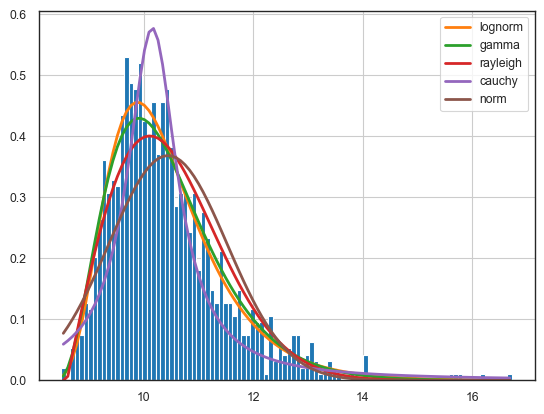

In [522]:
f = Fitter(a_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [523]:
#minimum, maximum = np.min(randomNumber), np.max(randomNumber)
#minimum, maximum

(8.61535837046959, 15.866839901751547)

As the probability distributions match, the next stage is to append the data to the new dataframe.

### Append data

In [524]:
df2['Alcohol'] = a_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol
0,7.513601,0.483550,0.537570,11.007689,14.420592,0.998937,3.279306,0.860454,9.649128
1,9.869087,0.385455,0.579533,3.837211,30.381073,0.995904,3.333349,0.739314,11.875709
2,9.522239,0.367196,0.099072,23.097502,30.230563,0.995721,3.490545,0.484721,10.333311
3,7.390002,0.673073,0.222984,25.992375,127.268999,0.994279,3.522734,0.612030,10.661459
4,7.531836,0.983339,0.041609,1.804264,9.889342,0.995079,3.229045,0.672409,11.154639
...,...,...,...,...,...,...,...,...,...
1138,5.984671,0.418595,0.298969,11.986432,38.347735,0.997759,3.526539,0.560095,9.779769
1139,8.381202,0.418785,0.148120,11.726770,42.427714,0.995011,3.469677,0.560870,10.379414
1140,10.495854,0.340780,0.587139,3.173972,39.247295,0.998531,3.381360,0.568655,9.883683
1141,12.539688,0.366514,0.026616,7.798173,89.096506,0.996357,3.491842,0.352487,9.340653


### Quality

From looking at [Visual summary of variables](#Visual-summary-of-variables), the variable **quality** is the only one that isn't a chemical compound, therefore the scoring or grading of the wines has been done manually and thus this variable won't be run through a library to determine the probability distribution.

It would be better to now see which variables are correlated with a better score or grade of wine.

## Variables and quality

Now to look at quality in a bit more detail and see the variation across the dataset.

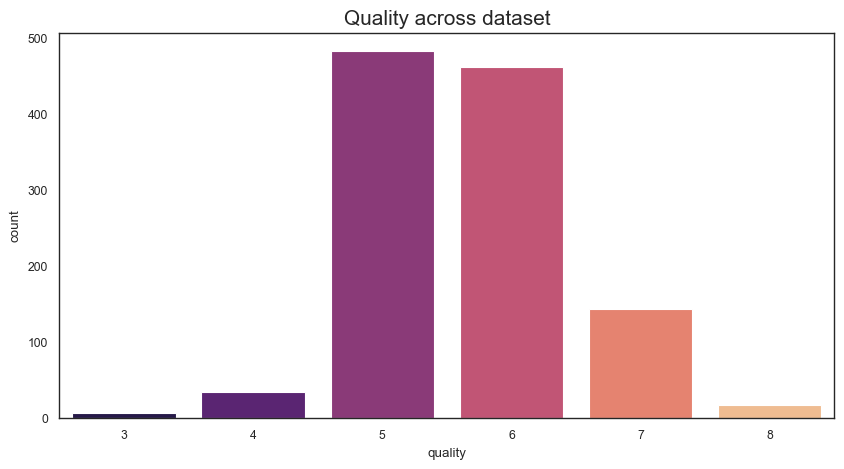

In [619]:
#Define inputs and output
X=df.drop(['quality'],axis=1)
y=df['quality']
# Set the plot size
fig,ax=plt.subplots(figsize=(10,5))
# Title
ax.set_title('Quality across dataset', fontsize=15)
sns.countplot(x=y, palette='magma');

It can be see from above that the majority of wines are graded 5 and 6, whereas only very few (approx 25) are graded 8.

The next stage would be to plot the variables against quality to see if there's any correlation with quality - specifically, looking at the variables with respect to grades 7 and 8.

In [629]:
# Remove 'quality' as quality vs. quality doesn't need to be plotted.
wine_variables.pop()

'quality'

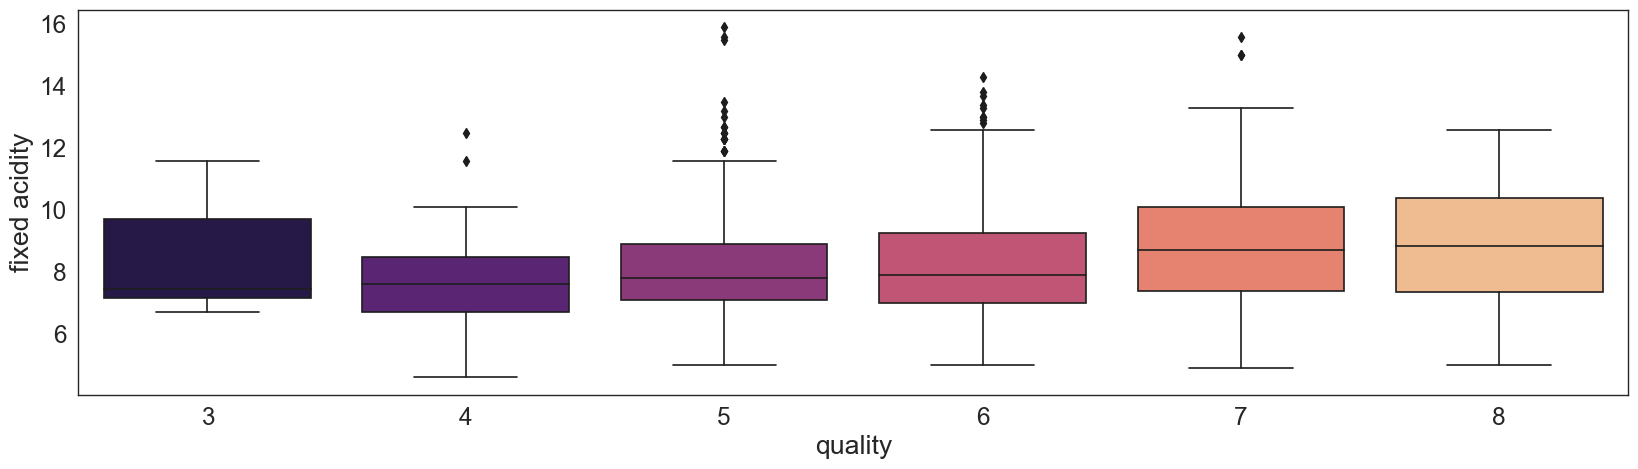

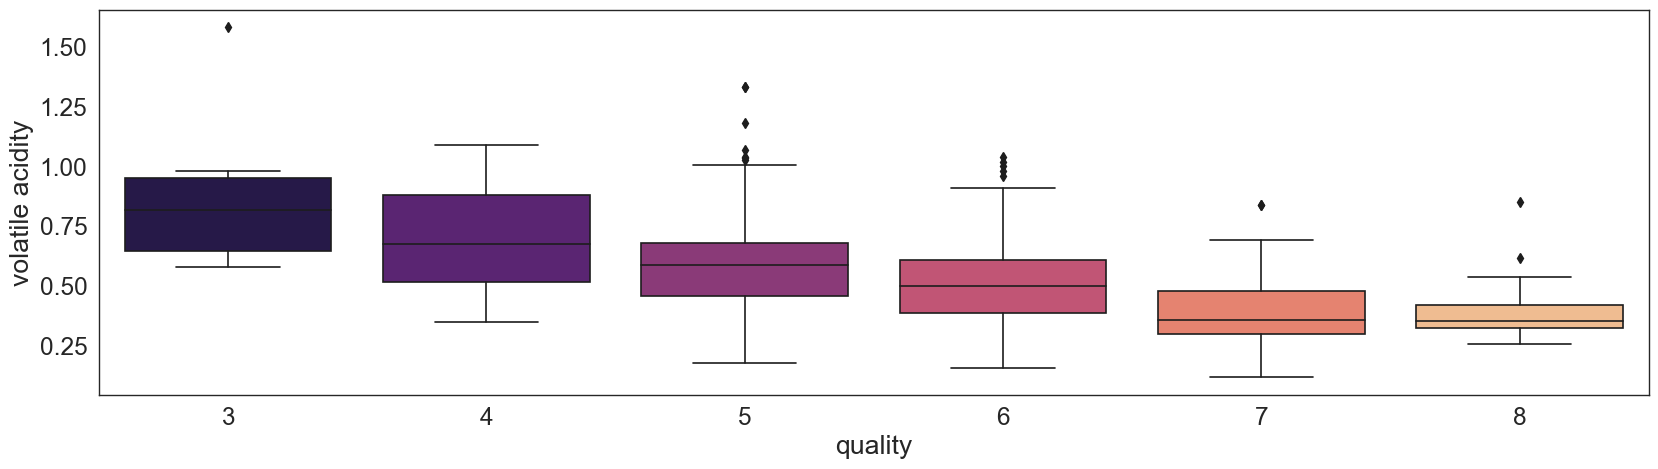

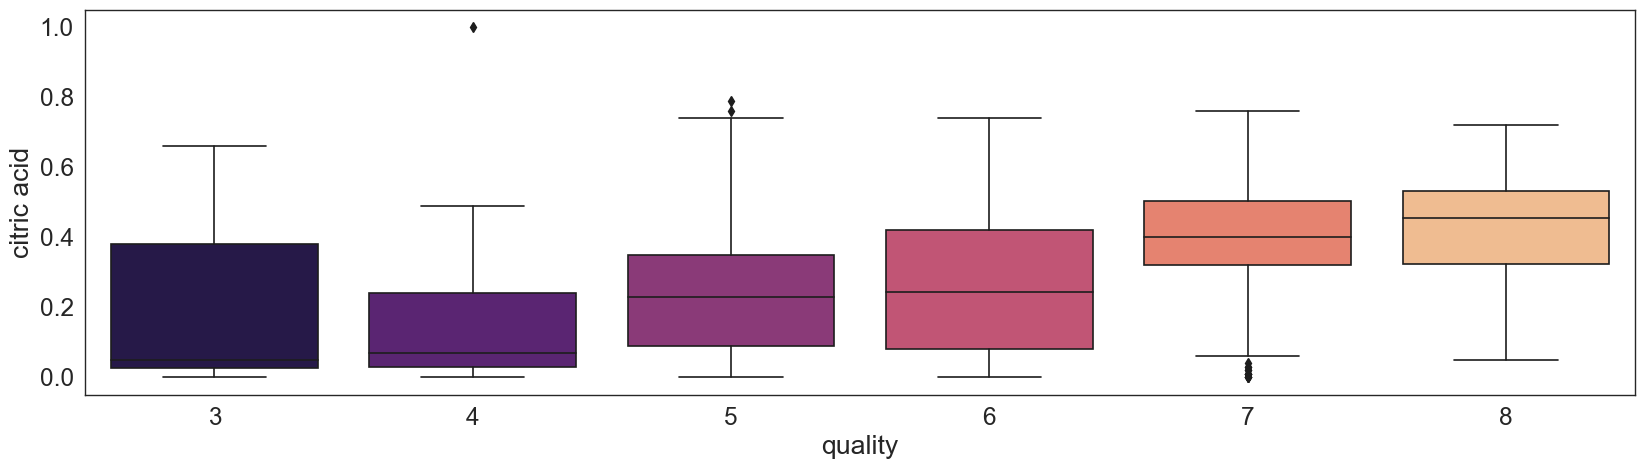

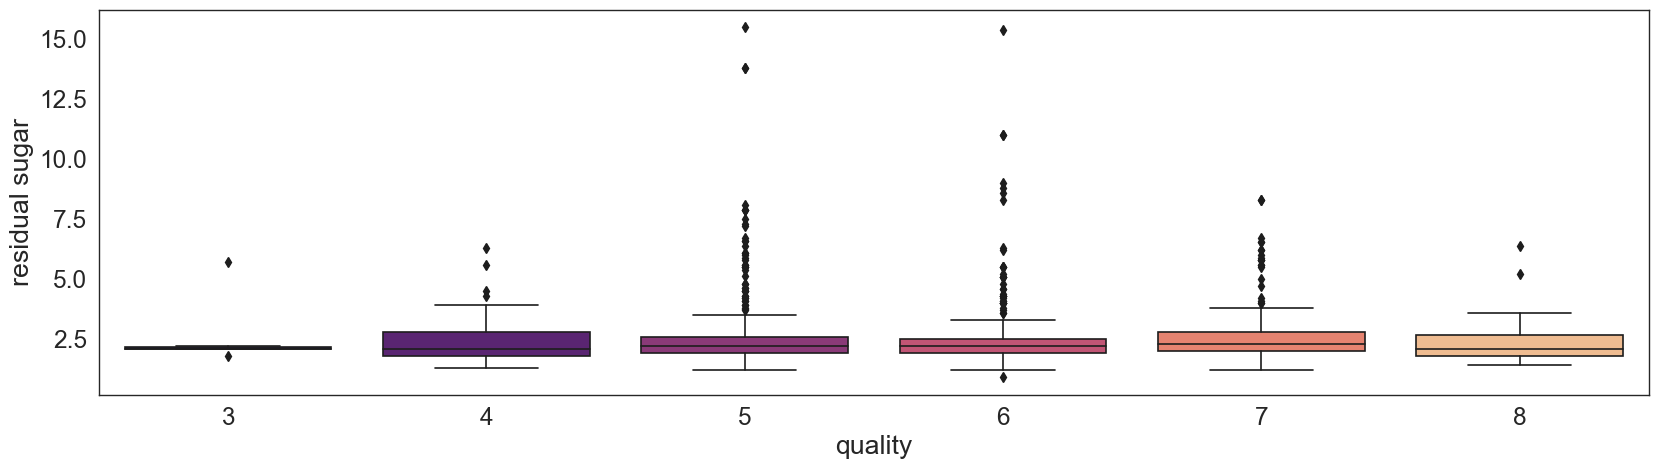

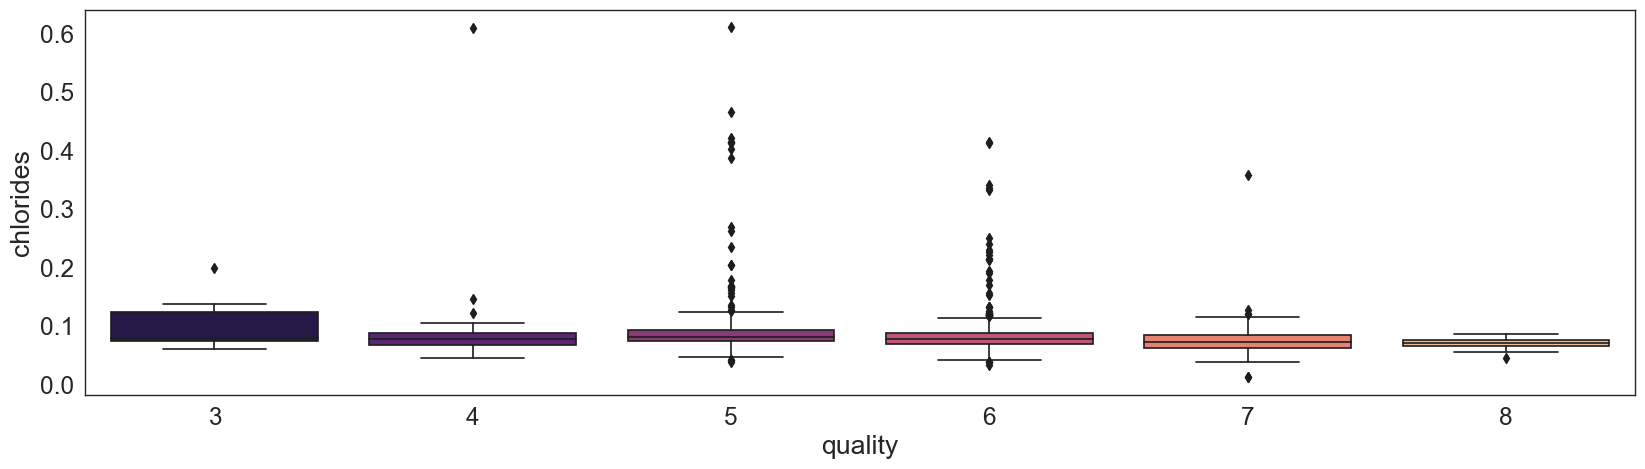

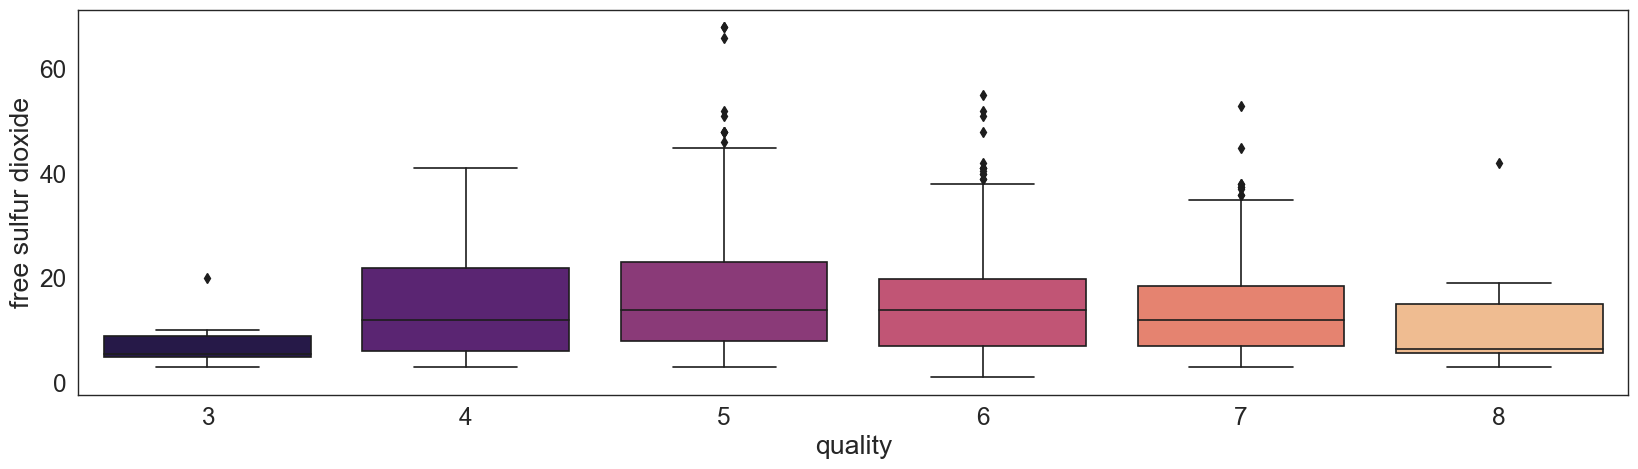

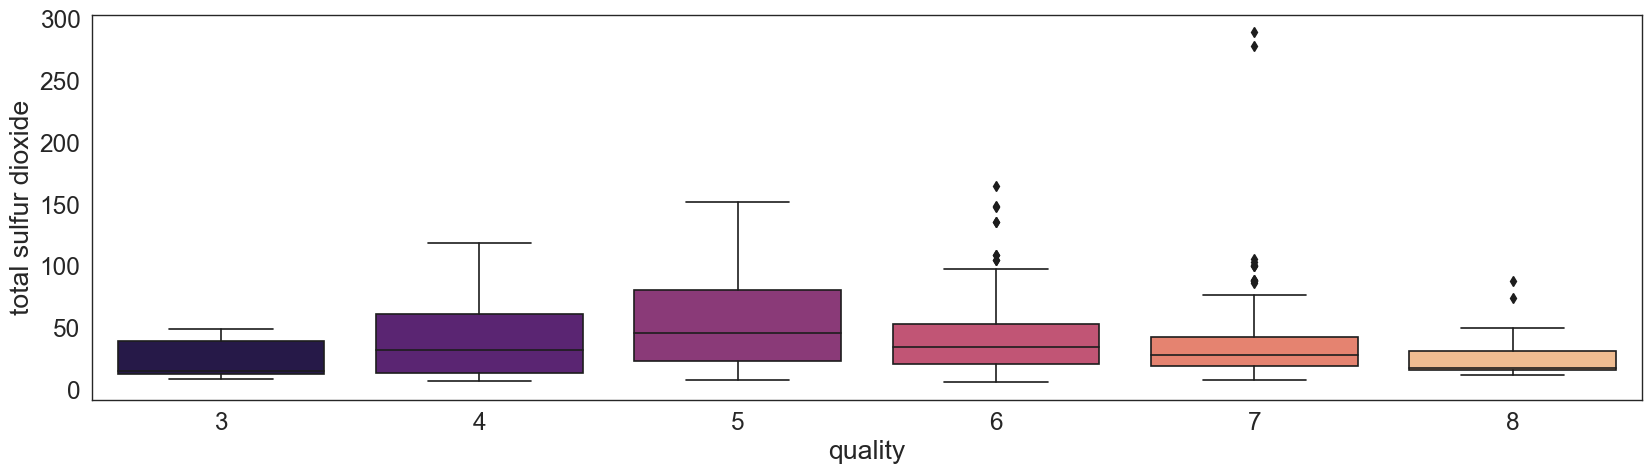

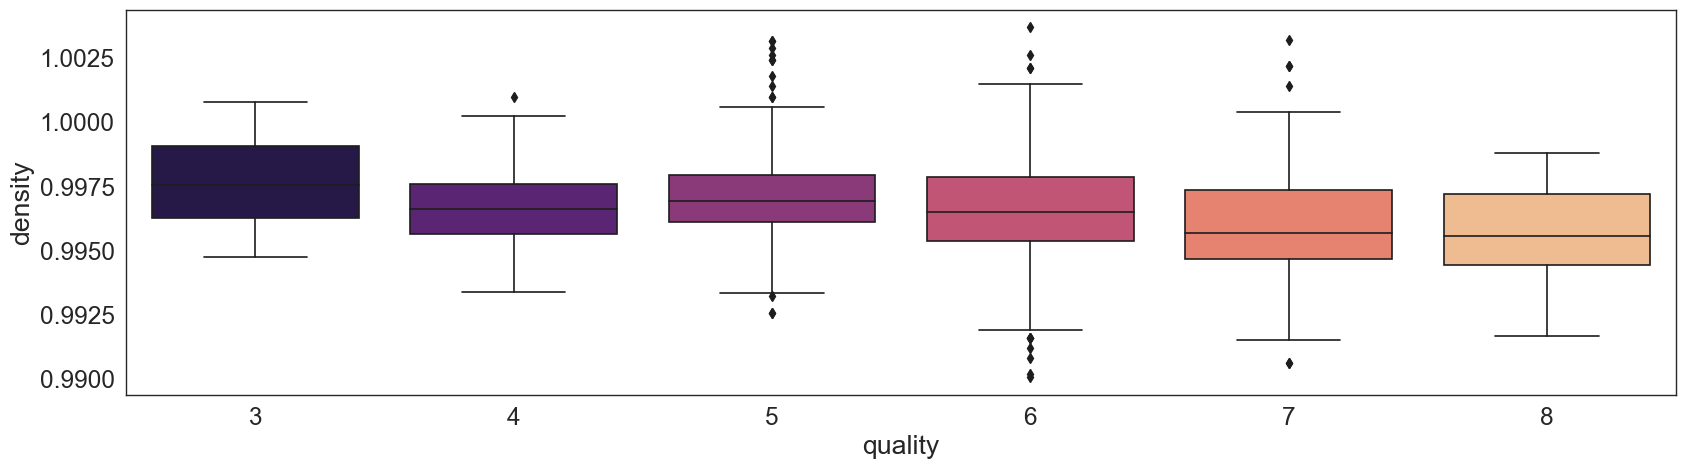

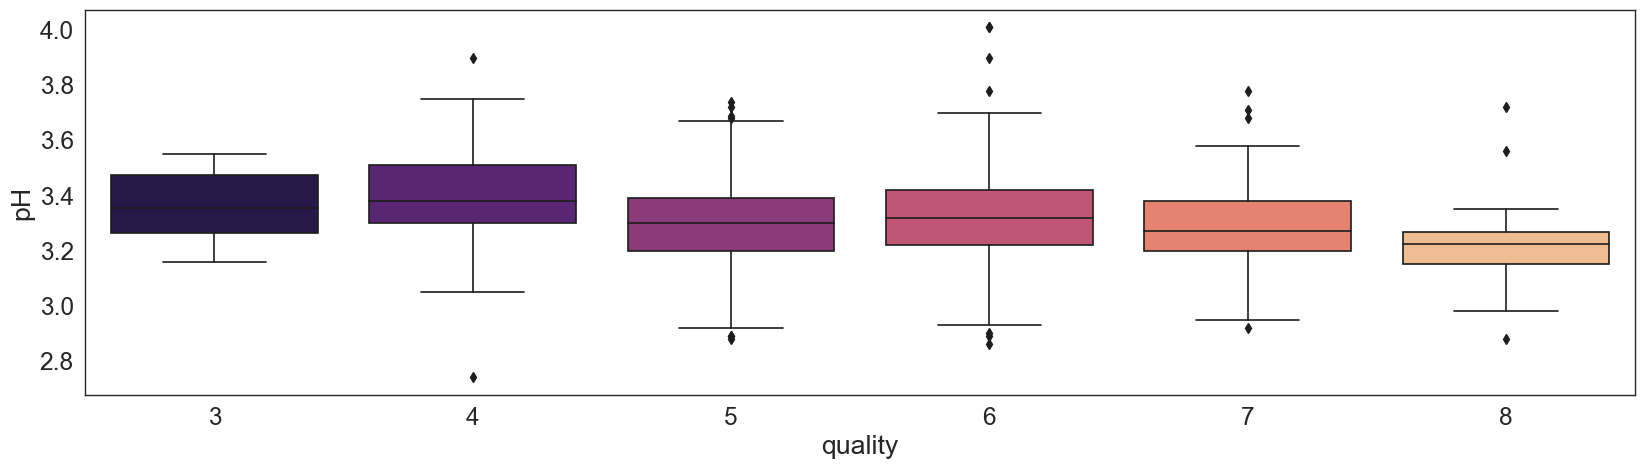

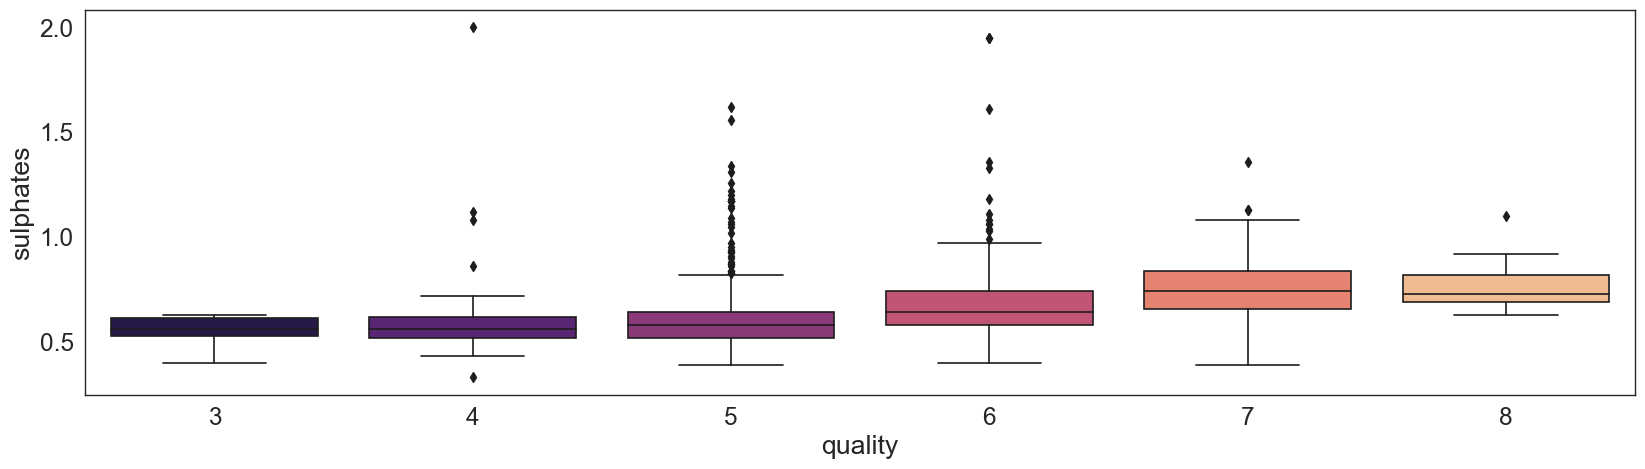

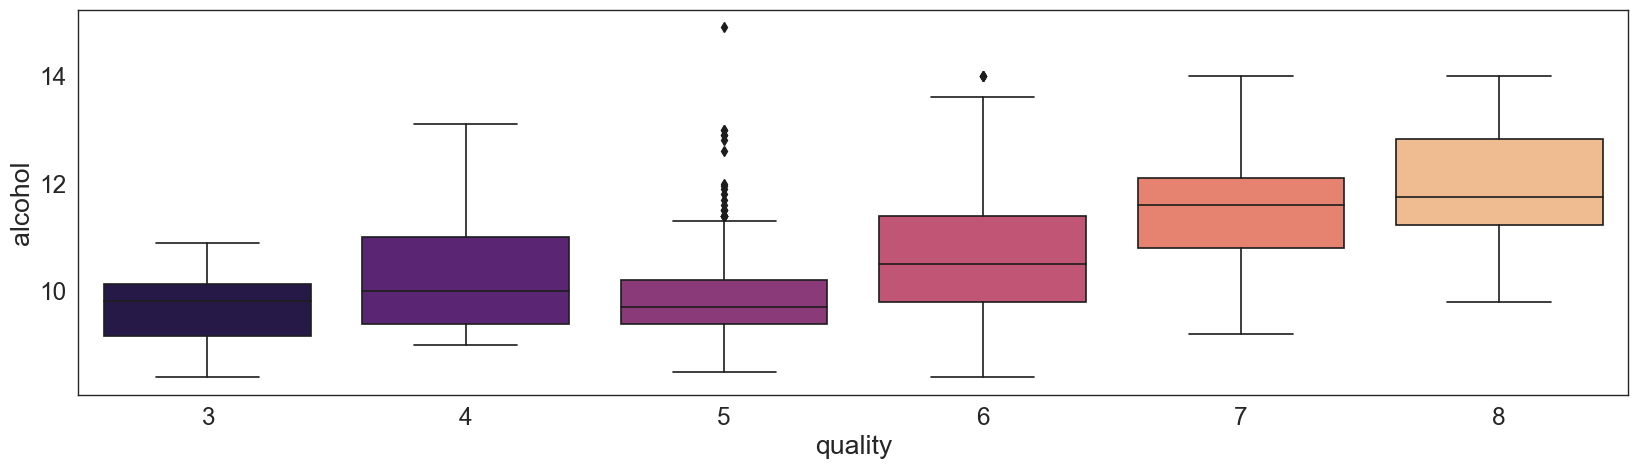

In [631]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in wine_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.boxplot(x=df['quality'], y=df[variable], palette='magma')
    #plt.show()

### Observations of variables versus quality

Once again, looking in particular at wines graded 7 or 8:
- Very low range of volatile acidity (8 has the lowest value and range).
- Citric acid higher overall in 7 and 8.
- Chlorides at the lowest level and tightest range for 8 (approx 0.75).
- Grade 8 wines have a lower overall value and tighter range for density.
- Grade 8 wines have the lowest pH and tightest range.
- Higher level of sulphates with grade 8 wines
- Alcohol at the highest level for grade (median approx. 12%)

To-do:
- explain the normalisation/accuracy
- explain the naming convention with the coding
- Add links to references for Numpy code, stackexchange

## Conclusion

## References

1. [Python Distfit package](https://pythonawesome.com/distfit-probability-density-fitting/)
2. [Definition of Generalised Extreme Value Distribution](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution)
3. [Definition of Beta Distribution](https://en.wikipedia.org/wiki/Beta_distribution)
4. [Definition of Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
5. [Python Fitter package](https://pypi.org/project/fitter/)
6. [Ways to use the describe() function](https://www.statology.org/pandas-describe/)
7. [Using Pandas to find Kurtosis](https://pythontic.com/pandas/dataframe-computations/kurtosis#:~:text=Kurtosis%20function%20in%20pandas%3A%201%20The%20pandas%20DataFrame,a%20normal%20distribution%20has%20a%20kurtosis%20of%200.)
8. [Performance comparison for column header lists](https://datatofish.com/list-column-names-pandas-dataframe/#:~:text=Here%20are%20two%20approaches%20to%20get%20a%20list,example%2C%20let%E2%80%99s%20create%20a%20DataFrame%20with%203%20columns%3A)
9. [Scipy lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html?highlight=lognormal)
10. [Changing Column headers in pandas](https://medium.com/swlh/pandas-different-ways-of-formatting-column-headers-aec6889d1881)
11. [Generating lognormal data](https://stackoverflow.com/questions/68361048/how-to-generate-lognormal-distribution-with-specific-mean-and-std-in-python)
12. [The Chi Squared distribution](#https://en.wikipedia.org/wiki/Chi-squared_distribution#:~:text=The%20chi-squared%20distribution%20is%20used%20in%20the%20common,a%20normal%20distribution%20from%20a%20sample%20standard%20deviation.)
13. [Adding a column in pandas](#https://datascienceparichay.com/article/pandas-add-column-to-dataframe/#:~:text=Pandas%20%E2%80%93%20Add%20Column%20to%20Existing%20DataFrame%201,dataframe%20assign%20%28%29%20function%20...%204%20Summary%20)
14.[Definition of Gamma distribution](#https://en.wikipedia.org/wiki/Gamma_distribution)
15.[How to determine the shape and scale for a gamma distribution](#https://math.stackexchange.com/questions/2873763/is-it-possible-to-determine-shape-and-scale-for-a-gamma-distribution-from-a-mean#:~:text=If%20you%20know%20the%20mean%20is%20%CE%BC%20and,making%20the%20corresponding%20rate%20parameter%20%CE%BC%20%CF%83%202)
16. [Numpy's documentation to generate the Gamma distribution](#https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)
17. [Definition of Powerlaw distribution](#https://en.wikipedia.org/wiki/Power_law)
18. [Numpy's documentation for powerlaw distribution](#https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html)
19. [Definition of the Cauchy distribution](#https://en.wikipedia.org/wiki/Cauchy_distribution)
20. [Pandas documentation - describe()](#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)